![](../img/b15_analysis.png)

<div style="page-break-after: always;"></div> 

# 데이터 정제 및 분석 응용

<img src="https://www.tomasbeuzen.com/python-programming-for-data-science/_static/logo.png" alt="python for data science" width="300" height="300">

1. 문자열 작업

2. 날짜 및 시간 작업

3. 계층적 인덱싱

4. 데이터프레임 시각화

5. 판다스 프로파일링

<div style="page-break-after: always;"></div> 

<h2>학습 목표<span class="tocSkip"></span></h2>

- `Series.str` 속성으로 판다스 문자열을 처리할 수 있다.
- 문자열 정제를 위하여 정규 표현식을 사용할 수 있다. 
- `Timestamp`, `Timedelta`, `Period`, `DateOffset`과 같은  
  `datetime` 객체를 용도에 맞게 사용할 수 있다. 
- `pd.Timestamp()`, `pd.Period()`, `pd.date_range()`, `pd.period_range()` 등을 써서  
  다양한 `datetime` 객체를 생성할 수 있다.  
- 문자열 인덱싱을 써서 `datetime` 인덱스를 구성할 수 있다. 
- `datetime` 자료로부터 시간 요소 추출, 시차 적용, 시간대 변경, 표본 추출 등과 같은  
  기본적 `datetime` 연산을 처리할 수 있다.  
- `.plot` 속성을 이용하거나, `pandas.plotting`이 제공하는 함수를 활용하여  
  기본적 차트 시각화를 작성할 수 있다. 
  
<div style="page-break-after: always;"></div>

## 1. 문자열 작업

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 20)  # https://wikidocs.net/75844

- 텍스트 자료에 대한 작업은 데이터 과학에서 일상적이다.  
  판다스 `Series`와 `Index` 객체는 문자열 처리를 위한 다양한 메소드를 제공한다.  
  이에 대하여 공부해 보자. 

- 문자열 작업에 관한 공부를  
  1.1 항 `String` 자료형부터 시작하자. 
  
<div style="page-break-after: always;"></div> 

### 1.1 `String` 자료형

- 문자열 자료는 (판다스에서) `object` 자료형으로 표현된다.  
  - `object` 자료형은 자료형이 혼합되었거나 크기를 모르는 자료를 총괄하는 자료형이다. 
  - 문자열을 위한 전용 자료형을 제공하는 것이 더 바람직한데,  
    판다스는 `StringDtype`이란 문자열 전용 자료형을 제공한다.
  - 본 교재의 편역 시점을 기준으로 최신 판다스는 2021년 9월 12일에 배포된 1.3.3 판인데,  
    `StringDtype` 자료형은 1.0 판부터 도입되었다.   
  - 그럼에도 불구하고, (아직까지는 과거 버전에 대한 호환성때문에)  
    `object` 자료형이 여전히 문자열에 대한 기본 자료형으로 지정되어 있다. 
  - 판다스 개발팀은 `string` 자료형을 지속적으로 테스트하면서 개선하고 있는 것으로 보인다.  
    [`StringDtype`에 관한 판다스 측의 자료](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-data-types)를 참고하라. 

- 1.1 항에서 `String` 자료형을 공부했다.
- 1.2 항에서 문자열 메소드를 공부하자.
  
<div style="page-break-after: always;"></div> 

### 1.2 문자열 메소드

- 속도 향상과 사용성 강화를 위하여 넘파이나 판다스와 같은 라이브러리는  
  벡터화 연산을 아래 예제와 같이 적용하고 있다.

In [2]:
x = np.array([1, 2, 3, 4, 5])
x * 2

array([ 2,  4,  6,  8, 10])

- 그러나 문자열 배열에 대해서는 이런 벡터화 연산이 적용되지 않는다.  
  아래 예제에서 이를 확인할 수 있다:

In [3]:
x = np.array(['Tom', 'Mike', 'Tiffany', 'Joel', 'Varada'])
x.upper()  # 대문자로 변환하는 upper() 메소드를 넘파이 배열에 적용 시도하면 오류 발생함

AttributeError: 'numpy.ndarray' object has no attribute 'upper'

- 문자열 배열에 대해서는 벡터화 연산이 적용되지 않기 때문에,  
  아래와 같이 컴프리헨션을 써서  
  모든 문자열 객체에 대하여 반복적으로 연산을 적용해야 한다: 


In [4]:
[name.upper() for name in x]

['TOM', 'MIKE', 'TIFFANY', 'JOEL', 'VARADA']

- 그런데 만일 문자열 배열이 결측치를 포함하고 있다면,  
  이마저도 오류를 유발한다: 

In [5]:
x = np.array(['Tom', 'Mike', None, 'Tiffany', 'Joel', 'Varada'])
[name.upper() for name in x]   

AttributeError: 'NoneType' object has no attribute 'upper'

- 사실 위 코드에서 `None` 대신에 `np.nan`을 썼다면 오류를 피할 수 있었다. 

In [45]:
x = np.array(['Tom', 'Mike', np.nan, 'Tiffany', 'Joel', 'Varada'])
[name.upper() for name in x]                                        # `np.nan`을 'NAN'으로 출력

['TOM', 'MIKE', 'NAN', 'TIFFANY', 'JOEL', 'VARADA']

- 판다스 개발팀에서도 문자열 메소드에 대한  
  이와 같은 (벡터화 및 결측치) 문제에 대하여 언급하고 있다.  
  - **문자열 메소드**는 판다스 `Series`나 `Index` 객체의 **`.str` 속성을 통하여 접근**이 가능하다. 
  - `.upper()`, `.lower()`, `.split()` 등과 같은  
    내장 문자열 메소드의 거의 대부분에 대하여 위 방법이 적용 가능하다. 

In [46]:
s = pd.Series(x)   # 리스트 x를 판다스 시리즈로 변환 
s

0        Tom
1       Mike
2        nan
3    Tiffany
4       Joel
5     Varada
dtype: object

In [47]:
s.str.upper()      # `Series`/`Index`의 str 속성을 통하여 접근 가능함, 원본 불변

0        TOM
1       MIKE
2        NAN
3    TIFFANY
4       JOEL
5     VARADA
dtype: object

In [48]:
s.str.split("ff", expand=True)  # str.split()으로 단일 열 시리즈를 두 열 데이터프레임으로 변환

,0,1
0,Tom,None
1,Mike,None
2,nan,None
3,Ti,any
4,Joel,None
5,Varada,None


In [49]:
s.str.split('a')                # expand=False, 열을 확장하지 않고, 단일 열 내부에서 리스트 원소로 분할 

0          [Tom]
1         [Mike]
2         [n, n]
3     [Tiff, ny]
4         [Joel]
5    [V, r, d, ]
dtype: object

In [50]:
s.str.len()                     # `NaN`에 대해서는 len() 반환값이 `NaN`

0    3
1    4
2    3
3    7
4    4
5    6
dtype: int64

- (행 인덱스이든 열 레이블이든) `index` 객체에 대해서도 이 방법이 적용 가능하다. 
- 아래 예제에서는 행 인덱스 및 열 레이블 정제에 관한 시범을 보인다. 

In [51]:
df = pd.DataFrame(np.random.rand(5, 3),  # [0, 1) 범위에서 균등분포 추출
                  columns = ['Measured Feature', 'recorded feature', 'PredictedFeature'],
                  index = [f"ROW{_}" for _ in range(5)])
df

,Measured Feature,recorded feature,PredictedFeature
ROW0,0.975308,0.204380,0.462618
ROW1,0.022623,0.464356,0.675539
ROW2,0.229371,0.658014,0.780674
ROW3,0.986340,0.789732,0.146424
ROW4,0.560409,0.113677,0.638135


- 열 레이블에서 대소문자와 띄어쓰기 일관성이 부족함 점을 개선해 보자. 
- 행 인덱스에서 문자와 숫자가 붙어 있는 점을 개선해 보자. 

In [52]:
df.columns

Index(['Measured Feature', 'recorded feature', 'PredictedFeature'], dtype='object')

In [53]:
type(df.columns)  # 데이터프레임 columns 객체는 Index 클래스

pandas.core.indexes.base.Index

- 열 레이블을 수정해 보자: 
  1. 열 레이블에서 첫 글자는 모두 대문자로 통일하고, "feature" 및 "Feature" 부분을 모두 제거 
  2. "ROW"를 소문자로 변환하고, 행 번호와 문자열 사이에 `_`를 삽입

In [54]:
df.columns                                                                      # 열 레이블 확인

Index(['Measured Feature', 'recorded feature', 'PredictedFeature'], dtype='object')

In [55]:
df.columns.str.capitalize()                                                      # 둘째 열에 주목

Index(['Measured feature', 'Recorded feature', 'Predictedfeature'], dtype='object')

In [56]:
df.columns.str.capitalize().str.replace("feature", "")                           # 1~2 열에는 후미 공백이 포함되었음

Index(['Measured ', 'Recorded ', 'Predicted'], dtype='object')

In [57]:
df.columns.str.capitalize().str.replace("feature", "").str.strip()               # 후미 공백 제거

Index(['Measured', 'Recorded', 'Predicted'], dtype='object')

In [58]:
df.columns = df.columns.str.capitalize().str.replace("feature", "").str.strip()  # 원본에 대입

- 행 인덱스를 수정해 보자. 

In [59]:
df.index                                               # 열 레이블 확인

Index(['ROW0', 'ROW1', 'ROW2', 'ROW3', 'ROW4'], dtype='object')

In [60]:
df.index.str.lower()                                    # 소문자로 변환

Index(['row0', 'row1', 'row2', 'row3', 'row4'], dtype='object')

In [61]:
df.index.str.lower().str.replace("w", "w_")             # 문자와 숫자 사이에 '_' 추가

Index(['row_0', 'row_1', 'row_2', 'row_3', 'row_4'], dtype='object')

In [62]:
df.index = df.index.str.lower().str.replace("w", "w_")  # 원본에 대입

In [63]:
df                                                      # 정제를 마친 행 인덱스와 열 레이블

,Measured,Recorded,Predicted
row_0,0.975308,0.204380,0.462618
row_1,0.022623,0.464356,0.675539
row_2,0.229371,0.658014,0.780674
row_3,0.986340,0.789732,0.146424
row_4,0.560409,0.113677,0.638135


- 멋지게 완성되었네요!  
  판다스의 문자열 메소드는 엄청나게 다양하다.  
  판다스가 제공하는 모든 문자열 메소드를 정리하면 다음과 같다.  
  (슬라이드 쇼를 멈추고 원본 노트북을 확인하자.)

| Method                     | Description                                                                                                                       |
| -------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| `Series.str.cat`           | Concatenate strings                                                                                                               |
| `Series.str.split`         | Split strings on delimiter                                                                                                        |
| `Series.str.rsplit`        | Split strings on delimiter working from the end of the string                                                                     |
| `Series.str.get`           | Index into each element (retrieve i-th element)                                                                                   |
| `Series.str.join`          | Join strings in each element of the Series with passed separator                                                                  |
| `Series.str.get_dummies`   | Split strings on the delimiter returning DataFrame of dummy variables                                                             |
| `Series.str.contains`      | Return boolean array if each string contains pattern/regex                                                                        |
| `Series.str.replace`       | Replace occurrences of pattern/regex/string with some other string or the return value of a callable given the occurrence         |
| `Series.str.repeat`        | Duplicate values (`s.str.repeat(3)` equivalent to `x * 3`)                                                                        |
| `Series.str.pad`           | "Add whitespace to left, right, or both sides of strings"                                                                         |
| `Series.str.center`        | Equivalent to `str.center`                                                                                                        |
| `Series.str.ljust`         | Equivalent to `str.ljust`                                                                                                         |
| `Series.str.rjust`         | Equivalent to `str.rjust`                                                                                                         |
| `Series.str.zfill`         | Equivalent to `str.zfill`                                                                                                         |
| `Series.str.wrap`          | Split long strings into lines with length less than a given width                                                                 |
| `Series.str.slice`         | Slice each string in the Series                                                                                                   |
| `Series.str.slice_replace` | Replace slice in each string with passed value                                                                                    |
| `Series.str.count`         | Count occurrences of pattern                                                                                                      |
| `Series.str.startswith`    | Equivalent to `str.startswith(pat)` for each element                                                                              |
| `Series.str.endswith`      | Equivalent to `str.endswith(pat)` for each element                                                                                |
| `Series.str.findall`       | Compute list of all occurrences of pattern/regex for each string                                                                  |
| `Series.str.match`         | "Call `re.match` on each element, returning matched groups as list"                                                               |
| `Series.str.extract`       | "Call `re.search` on each element, returning DataFrame with one row for each element and one column for each regex capture group" |
| `Series.str.extractall`    | "Call `re.findall` on each element, returning DataFrame with one row for each match and one column for each regex capture group"  |
| `Series.str.len`           | Compute string lengths                                                                                                            |
| `Series.str.strip`         | Equivalent to `str.strip`                                                                                                         |
| `Series.str.rstrip`        | Equivalent to `str.rstrip`                                                                                                        |
| `Series.str.lstrip`        | Equivalent to `str.lstrip`                                                                                                        |
| `Series.str.partition`     | Equivalent to `str.partition`                                                                                                     |
| `Series.str.rpartition`    | Equivalent to `str.rpartition`                                                                                                    |
| `Series.str.lower`         | Equivalent to `str.lower`                                                                                                         |
| `Series.str.casefold`      | Equivalent to `str.casefold`                                                                                                      |
| `Series.str.upper`         | Equivalent to `str.upper`                                                                                                         |
| `Series.str.find`          | Equivalent to `str.find`                                                                                                          |
| `Series.str.rfind`         | Equivalent to `str.rfind`                                                                                                         |
| `Series.str.index`         | Equivalent to `str.index`                                                                                                         |
| `Series.str.rindex`        | Equivalent to `str.rindex`                                                                                                        |
| `Series.str.capitalize`    | Equivalent to `str.capitalize`                                                                                                    |
| `Series.str.swapcase`      | Equivalent to `str.swapcase`                                                                                                      |
| `Series.str.normalize`     | Return Unicode normal form. Equivalent to `unicodedata.normalize`                                                                 |
| `Series.str.translate`     | Equivalent to `str.translate`                                                                                                     |
| `Series.str.isalnum`       | Equivalent to `str.isalnum`                                                                                                       |
| `Series.str.isalpha`       | Equivalent to `str.isalpha`                                                                                                       |
| `Series.str.isdigit`       | Equivalent to `str.isdigit`                                                                                                       |
| `Series.str.isspace`       | Equivalent to `str.isspace`                                                                                                       |
| `Series.str.islower`       | Equivalent to `str.islower`                                                                                                       |
| `Series.str.isupper`       | Equivalent to `str.isupper`                                                                                                       |
| `Series.str.istitle`       | Equivalent to `str.istitle`                                                                                                       |
| `Series.str.isnumeric`     | Equivalent to `str.isnumeric`                                                                                                     |
| `Series.str.isdecimal`     | Equivalent to `str.isdecimal`                                                                                                     |

- 문자열 치환을 위한 `df.replace()` 메소드는 알아 둘 만하다. 

In [64]:
df = pd.DataFrame({'col_1': ['replace me', 'b', 'c'],
                   'col_2': [1, 99999, 3]})
df

,col_1,col_2
0,replace me,1
1,b,99999
2,c,3


In [65]:
df.replace({'replace me': 'a',    # 문자열 치환
            99999: 2})            #   수치 치환
                                  # 사전 형태로 치환 내역 지정 

,col_1,col_2
0,a,1
1,b,2
2,c,3


- 1.2 항에서 문자열 메소드를 공부했다.
- 1.3 항에서 정규 표현식을 공부하자.
  
<div style="page-break-after: always;"></div> 

### 1.3 정규 표현식

- 정규 표현식(regular expression (regex))은 탐색 패턴을 정의하는 일련의 문자열이다. 
  - 복잡한 문자열 작업을 하려면 정규 표현식을 사용할 줄 알아야 한다. 
  - 파이썬만의 고유 문법이 아니라 문자열을 처리하는 모든 곳에서 사용한다. 
  - 줄여서 '정규식'으로 쓰기도 한다. 
  - [점프 투 파이썬의 설명](https://wikidocs.net/1642)을 참고하라. 

- 정규 표현식을 입력 인자로 받아들이는 판다스 문자열 함수가 많다.  
  - 아래는 정규 표현식을 입력 인자로 받아들이는 대표적인 판다스 문자열 함수의 예이다.
  - 아래 설명에서 `re`는 정규식을 처리하는 파이썬 패키지 이름이다. 

|메소드|설명|
|---|---|
|`match()`|탐색 대상 요소마다 re.match()를 호출하고, 논리값을 반환 
|`extract()`|탐색 대상 요소마다 re.match()를 호출하고, 부합하는 그룹을 문자열로 반환 
|`findall()`|탐색 대상 요소마다 re.findall()을 호출 
|`replace()`|부합하는 패턴을 다른 문자열로 치환 
|`contains()`|탐색 대상 요소마다 re.search()를 호출하고, 논리값을 반환 
|`count()`|부합하는 패턴의 개수 
|`split()`|str.split()과 같지만, 정규 표현식을 입력 인자로 허용 
|`rsplit()`|str.rsplit()과 같지만, 정규 표현식을 입력 인자로 허용 

- 예를 들어서, `Series` 내부에서 단일 자음으로 시작하고 끝나는 모든 단어를 쉽게 탐색할 수 있다: 

In [66]:
s = pd.Series(['Tom', 'Mike', None, 'Tiffany', 'Joel', 'Varada'])
s

0        Tom
1       Mike
2       None
3    Tiffany
4       Joel
5     Varada
dtype: object

In [67]:
s.str.findall(r'^[^AEIOU].*[^aeiou]$')  # (Tom, Tiffany, Joel)만 패턴에 부합

0        [Tom]
1           []
2         None
3    [Tiffany]
4       [Joel]
5           []
dtype: object

- 직전 코드에 적용된 정규식 요소는 다음과 같다:

|요소|설명|
|---|---|
|`^`|`^` 부분은 문자열의 시작을 지정한다.|
|`[^AEIOU]`|대괄호 부분은 한 글자에 해당하는 패턴을 지정한다. <br>대괄호 내부에서 `^`를 쓰면 '부정'이라는 의미인데, <br>첫 글자가 대문자 모음('A', 'E', 'I', 'O', 및 'U')이 아니라는 의미이다. |
|`.*`|`.` 부분은 모든 문자를 의미하며, `*` 부분은 "0회 이상"이라는 의미이다. <br>따라서 문자열의 시작과 끝을 제외한 중간에 <br>어떤 문자가 몇 개 등장하더라도 문제 삼지 않겠다는 의미이다. |
|`[^aeiou]`|대괄호 부분은 한 글자에 해당하는 패턴을 지정한다. <br>대괄호 내부에서 `^`를 쓰면 '부정'이라는 의미인데, <br>마지막 글자가 소문자 모음('a', 'e', 'i', 'o', 및 'u')이 아니라는 의미이다.|
|`$`| `$` 부분은 문자열의 끝을 지정한다. |

- 직전 코드에서 `r`이라고 문자열 상수 앞에 붙은 부분은  
  가공하지 않은 원래 상태의 '생 문자열 상수(raw string literal)'라는 의미이다. 
- 아래 예제에서 일반 문자열 상수와 생 문자열 상수의 차이를 확인하라
  - 일반 문자열 상수에서는 `'\n'`이 줄바꿈 문자에 해당하는 이스케이프 코드로 처리된다. 
  - 생 문자열 상수에서는 `'\n'`이 줄바꿈 문자에 해당하는 이스케이프 코드를 무시하고 그냥 문자열로 처리된다. 


In [68]:
str = 'Hi\nHello'  # 일반 문자열 상수
print(str)

Hi
Hello


In [69]:
str = r'Hi\nHello'  # 생 문자열 상수
print(str)

Hi\nHello


- 복잡한 텍스트를 정제해야 하는 상황이라면 정규식이 마법같은 역햘을 할 수 있다.  
  자전거 데이터 집합에서 한 가지 예제를 더 살펴 보자:

In [70]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- `Comments` 열에 "Rain" 또는 "rain"이 포함된 행을 다음과 같이 탐색할 수 있다:

In [71]:
df.loc[df['Comments'].str.contains(r"[Rr]ain")]

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"17 Sep 2019, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
"26 Sep 2019, 00:13:33",Afternoon Ride,Ride,1860,12.52,raining


- 만약 위 탐색 결과에서 "Raining"이나 "raining"은 배제하고 싶다면 다음과 같이 할 수 있다:

In [72]:
df.loc[df['Comments'].str.contains(r"^[Rr]ain$")]

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain


- `df.str.split()` 메소드를 써서 한 열의 문자열을 두 열로 분리할 수 있다. 
  - 성과 이름이 공백으로 구분되어 `df.name` 열에 저장되어 있다고 가정하면,  
    `df['name'].str.split(' ', expand=True)` 명령으로 
    성과 이름을 별도의 열로 분리할 수도 있다. 

    

  - 심지어 (마침표, 쉼표 및 느낌표를 포함하는) 구두점을 기반으로  
    문자열을 분할하거나 새로운 열로 분리할 수도 있다:


In [73]:
df['Comments'].str.split(r"[.,!]", expand=True)

,0,1
Date,,
"10 Sep 2019, 00:13:04",Rain,None
"10 Sep 2019, 13:52:18",rain,None
"11 Sep 2019, 00:23:50",Wet road but nice weather,None
"11 Sep 2019, 14:06:19",Stopped for photo of sunrise,None
"12 Sep 2019, 00:28:05",Tired by the end of the week,None
...,...,...
"4 Oct 2019, 01:08:08",Very tired,riding into the wind
"9 Oct 2019, 13:55:40",Really cold,But feeling good
"10 Oct 2019, 00:10:31",Feeling good after a holiday break,


- 직전 예제의 열 레이블을 확인하고, 이를 수정해 보자. 

In [74]:
df['Comments'].str.split(r"[.,!]", expand=True).columns

RangeIndex(start=0, stop=2, step=1)

In [75]:
df['Comments'].str.split(r"[.,!]", expand=True).rename(
    columns={0: 'Comments_0', 1:'Comments_1'})

,Comments_0,Comments_1
Date,,
"10 Sep 2019, 00:13:04",Rain,None
"10 Sep 2019, 13:52:18",rain,None
"11 Sep 2019, 00:23:50",Wet road but nice weather,None
"11 Sep 2019, 14:06:19",Stopped for photo of sunrise,None
"12 Sep 2019, 00:28:05",Tired by the end of the week,None
...,...,...
"4 Oct 2019, 01:08:08",Very tired,riding into the wind
"9 Oct 2019, 13:55:40",Really cold,But feeling good
"10 Oct 2019, 00:10:31",Feeling good after a holiday break,


- 정규 표현식에 대한 모든 것을 지금 알아야 하는 것은 아니다. 
  - 향후에 문자열에 대한 복잡한 작업을 수행해야 할 상황이 되면,  
    '정규표현식을 써서 쉽게 해결할 수 있다고 하던데...'라는 생각이 들기를 바란다. 
  - 필요할 때, 검색하고 공부하면 된다. 

- 1.3 항에서 정규 표현식을 공부했다.
- 이제 날짜/시간 조작 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

## 2. 날짜/시각 작업

- 문자열에 대하여 그랬듯이,  
  판다스는 시간 계열 데이터에 대해서도 광범위한 기능을 제공한다. 
- 2.1 항에서 `datetime` 자료형 공부부터 시작하자.

### 2.1 날짜/시각 자료형

#### 2.1.1 파이썬 시계열

- 파이썬 내장 모듈 `datetime`에서 제공하는 `datetime` 및 `timedelta` 자료형에 대해서 공부하자. 
  1. 날짜/시각 자료형
  2. 국가/언어 설정
  3. `datetime` 활용
  4. `timedelta` 활용

1. 날짜/시각 자료형

In [76]:
from datetime import datetime, timedelta        # 모듈에서 특정 클래스를 선별적으로 수입

In [77]:
now = datetime.now()                            # datetime 클래스가 제공하는 now() 메소드로 현재 시각 획득
now

datetime.datetime(2021, 10, 4, 17, 52, 0, 195744)

In [78]:
# strftime()은 날짜/시각을 문자열로 변환하는 메소드
(now, 
 now.strftime('%B'),                            # 달 이름
 now.strftime('%A'))                            # 요일 이름 

(datetime.datetime(2021, 10, 4, 17, 52, 0, 195744), '10월', '월요일')

In [79]:
# timedelta()는 시간 간격을 처리하는 클래스
now + timedelta(days=1)                        # 하루 후 확인                      

datetime.datetime(2021, 10, 5, 17, 52, 0, 195744)

2. 국가 및 언어 설정

In [80]:
import locale                                  # 모듈 수입

In [81]:
locale.getlocale()                             # 로케일 확인

('Korean_Korea', '949')

In [82]:
(now, 
 now.strftime('%B'),                           # 달 이름
 now.strftime('%A'))                           # 요일 이름 

(datetime.datetime(2021, 10, 4, 17, 52, 0, 195744), '10월', '월요일')

In [83]:
locale.setlocale(locale.LC_ALL, '')            # 모든 범주의 로케일을 기본값으로 설정

'Korean_Korea.949'

In [84]:
# locale.setlocale(locale.LC_ALL, 'Korean_Korea.UTF-8')  # 로케일 변경

In [85]:
locale.getlocale()

('Korean_Korea', '949')

In [86]:
(now, 
 now.strftime('%B'),                           # 달 이름
 now.strftime('%A'))                           # 요일 이름 

(datetime.datetime(2021, 10, 4, 17, 52, 0, 195744), '10월', '월요일')

- `locale`을 초기화하면, 달이나 요일 이름이 한글로 출력된다. 
- 이제 아래와 같이 출력할 수 있다. 

In [87]:
(now, 
 now.strftime('%Y-%m-%d (%A) %H:%M:%S'),            # '%A'로 요일 출력
 now.strftime('%Y년 %B %d일 (%A) %H시 %M분 %S초'))  # '%B'로 월 출력

(datetime.datetime(2021, 10, 4, 17, 52, 0, 195744),
 '2021-10-04 (월요일) 17:52:00',
 '2021년 10월 04일 (월요일) 17시 52분 00초')

3. `datetime` 활용

- 파이썬 `datetime()`으로 `datetime` 자료형을 생성할 수 있다. 

In [88]:
from datetime import datetime                                            # 파이썬 datetime 모듈

date = datetime(year=1919, month=3, day=1, hour=14, minute=0, second=0)  # 삼일절 날짜/시각 생성

- `datetime.strftime()` 메소드에 다양한 출력 형식 지정자를 사용할 수 있다. 

In [89]:
from datetime import datetime                                            # 파이썬 datetime 모듈

date = datetime(year=1919, month=3, day=1, hour=14, minute=0, second=0)  # 삼일절 날짜/시각 생성

print(f"{date.strftime('%Y')}년 "                                        # date.strftime('%Y'), 년
    + f"{date.strftime('%B')} "                                          # date.strftime('%B'), '월'이 포함됨
    + f"{date.strftime('%d')}일 "                                        # date.strftime('%d'), 일
    + f"{date.strftime('%A')}\n"                                         # date.strftime('%A'), '요일'이 포함됨
    + f"{date.strftime('%U')} 번째 주\n"                                 # date.strftime('%U')' 주차, 0부터 시작되는 주차 
    + f"{date.strftime('%j')} 번째 날\n"                                 # date.strftime('%j'), 일차, '선두 '0' 출력
    + f"{date.strftime('%p')} "                                          # date.strftime('%p'), 오전/오후
    + f"{date.strftime('%I')}시 "                                        # date.strftime('%I'), 시, 선두 '0' 출력
    + f"{date.strftime('%M')}분 "                                        # date.strftime('%M'), 분, '00분'으로 출력 
    + f"{date.strftime('%S')}초")                                        # date.strftime('%S'), 초, '00초'로 출력

1919년 3월 01일 토요일
08 번째 주
060 번째 날
오후 02시 00분 00초


- `datetime.strftime()` 메소드 외에도, 다양한 속성과 메소드를 쓸 수 있다. 

In [90]:
요일 = ['월', '화', '수', '목', '금', '토', '일']
date = datetime(year=1919, month=3, day=1, hour=14, minute=0, second=0)  # 삼일절

print(f"{date.year}년 "                                                  # date.year
    + f"{date.month}월 "                                                 # date.month, '월'을 포함해야 함
    + f"{date.day}일 "                                                   # date.day 
    + f"({date.weekday()}) "                                             # date.weekday()
    + f"({요일[date.weekday()]})\n"                                      # 요일[date.weekday()]
    + f"{date.isocalendar()[1]} 번째 주\n"                               # date.isocalendar()[1], year, week, weekday
    + f"{date.timetuple()}\n"                                            # date.timetuple()
    + f"{date.timetuple().tm_yday} 번째 날\n"                            # date.timetuple().tm_yday
    + f"{'오전' if date.timetuple().tm_hour < 12 else '오후'} "          # 오전/오후 
    + f"{date.hour if date.hour <= 12 else date.hour-12}시 "             # date.hour 
    + f"{date.minute}분 "                                                # date.mimute
    + f"{date.second}초")                                                # date.second

1919년 3월 1일 (5) (토)
9 번째 주
time.struct_time(tm_year=1919, tm_mon=3, tm_mday=1, tm_hour=14, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=60, tm_isdst=-1)
60 번째 날
오후 2시 0분 0초


- `strptime()`으로 문자열 표현에서 직접 `datetime`을 생성할 수도 있다.  
- 한글판 파이썬 공식 문서의 [날짜와 시간에 대한 형식](https://docs.python.org/ko/3/library/datetime.html#strftime-and-strptime-format-codes)을 참고하라. 
- `strptime()`은 'string **p**revious time'을 의미하는데, *string* 객체를 datetime 객체로 변환한다.  

In [91]:
date = datetime.strptime("1919-1-1, 14:0:0", "%Y-%m-%d, %H:%M:%S")
date.timetuple()

time.struct_time(tm_year=1919, tm_mon=1, tm_mday=1, tm_hour=14, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=1, tm_isdst=-1)

- `strftime()`으로 datetime 객체로부터 요소를 추출할 수 있다
- `strftime()`은 'string **f**orward time'을 의미하는데, datetime 객체를 *string* 객체로 변환한다.

In [92]:
print(f"  연도: {date.strftime('%Y')}")
print(f"    월: {date.strftime('%m')} -> {int(date.strftime('%m'))}")
print(f"    일: {date.strftime('%d')} -> {int(date.strftime('%d'))}")
print(f"  요일: {date.strftime('%a')}")
print(f"  주차: {date.strftime('%j')}, {int(date.strftime('%j'))}")
print(f"시간대: {date.strftime('%p')}")

  연도: 1919
    월: 01 -> 1
    일: 01 -> 1
  요일: 수
  주차: 001, 1
시간대: 오후


4. `timedelta` 활용

- 파이썬 `timedelta()`로 특정 시각에서 일정 시간이 경과한 시각을 구하는 예제이다:

In [93]:
date

datetime.datetime(1919, 1, 1, 14, 0)

In [94]:
date - timedelta(days=1.5)

datetime.datetime(1918, 12, 31, 2, 0)

In [95]:
date + timedelta(weeks=1)

datetime.datetime(1919, 1, 8, 14, 0)

In [96]:
date - timedelta(hours=1.5)

datetime.datetime(1919, 1, 1, 12, 30)

- 2.1.1 목에서는 파이썬 날짜/시각 자료형을 공부했다.  
  1. 날짜/시각 자료형
  2. 국가/언어 설정
  3. `datetime` 활용
  4. `timedelta` 활용
- 2.1.2 목에서는 넘파이 날짜/시각 자료형을 공부하자. 

#### 2.1.2 넘파이 시계열

- 문자열에서도 그랬듯이,  
  파이썬 `datetime`을 배열에서 처리하는 작업은 어렵고 비효율적이다.  
- 이러한 상황을 고려하여 넘파이에서는  
  - 날짜를 더 효과적으로 처리하는 새로운 `datetime64` 자료형을 제공한다.
  - 넘파이 `datetime64` 자료형은 벡터화를 지원한다. 

- 넘파이 `datetime64` 자료형을 `np.array()` 및 `np.arange()`에서 사용할 수 있다. 

- `np.array()` 메소드로 날짜/시각 배열을 생성할 수 있다. 

In [97]:
dates = np.array(["2020-07-09", "2020-08-10"], dtype="datetime64")
dates                                                           # 개별 날짜를 저장한 넘파이 datetime64[D] 자료형 배열

array(['2020-07-09', '2020-08-10'], dtype='datetime64[D]')

- `np.arange()` 메소드로 날짜/시각 배열을 생성할 수 있다:

In [98]:
dates = np.arange("2020-07", "2020-12", dtype="datetime64")  # [시작, 끝), 월(M) 단위
dates

array(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11'],
      dtype='datetime64[M]')

- 이렇게 만든 배열을 이용해서, 시간에 관한 벡터화 배열 연산을 쉽게 수행할 수 있다.  
  넘파이 `datetime64`의 단위와 형식에 대한 모든 사항에 대한 설명을 [이 문서에서 참고](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units)할 수 있다. 

In [99]:
dates = np.arange("2020-07", "2020-12", dtype="datetime64")  # [시작, 끝), 월(M) 단위
dates

array(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11'],
      dtype='datetime64[M]')

In [100]:
dates + np.timedelta64(2, 'M')                               # 넘파이 timedelta64 객체

array(['2020-09', '2020-10', '2020-11', '2020-12', '2021-01'],
      dtype='datetime64[M]')

- 2.1 항에서 날짜/시간 자료형의 개념을  
  파이썬 및 넘파이 중심으로 공부했다.
- 2.2 항에서 날짜/시간 자료형의 생성 방법을  
  판다스 중심으로 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 2.2 판다스 시계열 생성

- 넘파이가 날짜와 시각을 배열의 세상으로 데려오긴 했지만,  
  데이터 정제에서 일반적으로 필요한 과제를 수행하기에는 상당한 기능적 제약이 존재한다. 
- 부족한 부분은 판다스 라이브러리에게 의지해야 한다.  
  판다스에서는 4 종의 핵심 객체를 제공하는데, 지금부터 이를 공부한다:
  1. (np.datetime64와 유사한) Timestamp 
  2. (np.timedelta64와 유사한) Timedelta 
  3. (날짜/시각의 정규적 범위를 다루는 맞춤형 객체인) Period 
  4. (timedelta와 유사하지만 달력의 규칙을 반영한 맞춤형 객체인) DateOffset 

#### 2.2.1 기본적 생성 방법

시계열과 관련하여 보편적으로 원하는 판다스 작업은 다음과 같다:
1. `pd.Timestamp()`로 `1919-03-01 00:00:00`같은 특정 시점을 생성
2. `pd.Period()`로 `1919년 3월`같은 특정 기간을 생성
3. `pd.date_range()` 및 `pd.period_range()`로 datetime 배열을 생성

1. `pd.Timestamp()`로 특정 시점을 생성하는 방법부터 알아보자. 

In [141]:
print(pd.Timestamp('1919-03-01'))                         # 문자열로부터
print(pd.Timestamp(year=1919, month=3, day=1))            # 날짜 시각의 요소로부터
print(pd.Timestamp(datetime(year=1919, month=3, day=1)))  # datetime 객체로부터
                                                          # 모두 특정 시점

1919-03-01 00:00:00
1919-03-01 00:00:00
1919-03-01 00:00:00


In [142]:
print(pd.Timestamp('1919-03-01 14:3:5'))                                               # 문자열로부터
print(pd.Timestamp(year=1919, month=3, day=1, hour=14, minute=3, second=5))            # 날짜 시각의 요소로부터
print(pd.Timestamp(datetime(year=1919, month=3, day=1, hour=14, minute=3, second=5)))  # datetime 객체로부터
                                                                                       # 모두 특정 시점

1919-03-01 14:03:05
1919-03-01 14:03:05
1919-03-01 14:03:05


2. 직전 예제에서는 `pd.Timestamp()`로 특정 시점을 생성했지만,  
  아래 예제에서는 특정 기간을 생성하기 위하여 `pd.Period()`를 사용한다:

In [143]:
span = pd.Period('1919-03-01')  # 날짜를 기간으로 생성

print(span)
print(span.start_time)          # 기간 시작 시점
print(span.end_time)            # 기간 종료 시점

1919-03-01
1919-03-01 00:00:00
1919-03-01 23:59:59.999999999


In [144]:
시점 = pd.Timestamp('1919-03-01 12:00')
기간 = pd.Period('1919-03-01')

print(f"시점: {시점}")
print(f"기간: {기간}")
print(f"시점이 기간에 포함되는지? {기간.start_time <= 시점 <= 기간.end_time}")

시점: 1919-03-01 12:00:00
기간: 1919-03-01
시점이 기간에 포함되는지? True


3. 때로는 단일 값이 아니라 datetime의 배열을 생성하고 싶다.  
   datetime의 배열로 `DatetimeIndex`/`PeriodIndex`/`TimedeltaIndex` 클래스를 생성한다:

- `pd.date_range()`는 `DatetimeIndex`를 반환한다. 

In [145]:
pd.date_range('1919-03-01 12:00',
              '1919-03-11 12:00',  # 종료 시점도 포함됨 
              freq='D')

DatetimeIndex(['1919-03-01 12:00:00', '1919-03-02 12:00:00',
               '1919-03-03 12:00:00', '1919-03-04 12:00:00',
               '1919-03-05 12:00:00', '1919-03-06 12:00:00',
               '1919-03-07 12:00:00', '1919-03-08 12:00:00',
               '1919-03-09 12:00:00', '1919-03-10 12:00:00',
               '1919-03-11 12:00:00'],
              dtype='datetime64[ns]', freq='D')

- `pd.period_range()`는 `PeriodIndex`를 반환한다. 

In [146]:
pd.period_range('1919-03-01',
                '1919-03-11',      # 종료 기간도 포함됨
                freq='D')

PeriodIndex(['1919-03-01', '1919-03-02', '1919-03-03', '1919-03-04',
             '1919-03-05', '1919-03-06', '1919-03-07', '1919-03-08',
             '1919-03-09', '1919-03-10', '1919-03-11'],
            dtype='period[D]')

- `pd.Timedelta()`는 `TimedeltaIndex`를 반환한다.  
  `pd.Timedelta()`를 써서 시간에 대한 덧셈이나 뺄셈을 벡터화 방식으로 처리할 수 있다: 

In [147]:
pd.date_range('1919-03-01 12:00', '1919-03-11 12:00', freq='D') + pd.Timedelta('1.5 hour')

DatetimeIndex(['1919-03-01 13:30:00', '1919-03-02 13:30:00',
               '1919-03-03 13:30:00', '1919-03-04 13:30:00',
               '1919-03-05 13:30:00', '1919-03-06 13:30:00',
               '1919-03-07 13:30:00', '1919-03-08 13:30:00',
               '1919-03-09 13:30:00', '1919-03-10 13:30:00',
               '1919-03-11 13:30:00'],
              dtype='datetime64[ns]', freq='D')

In [148]:
pd.date_range('1919-03-01 12:00', '1919-03-11 12:00', freq='D') + pd.Timedelta('1.9 hour')

DatetimeIndex(['1919-03-01 13:54:00', '1919-03-02 13:54:00',
               '1919-03-03 13:54:00', '1919-03-04 13:54:00',
               '1919-03-05 13:54:00', '1919-03-06 13:54:00',
               '1919-03-07 13:54:00', '1919-03-08 13:54:00',
               '1919-03-09 13:54:00', '1919-03-10 13:54:00',
               '1919-03-11 13:54:00'],
              dtype='datetime64[ns]', freq='D')

- 마지막으로, 판다스는 날짜/시간 결측치를 `pd.NaT`(Not a Time)로 표시하는데, 이는 `np.NaN`과 유사한 것이다: 

In [149]:
pd.Timestamp(pd.NaT)

NaT

- 2.2.1 목에서 날짜/시간 자료형의 기본적 생성 방법을 공부했다.
    1. 특정 시점을 생성하는 `pd.Timestamp()`
    2. 특정 기간을 생성하는 `pd.Period()`
    3. 시계열 배열을 생성하는 `pd.date_range()` 및 `pd.period_range()` 
- 2.2.2 목에서 기존 자료를 날짜/시간 자료형으로 변환하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

#### 2.2.2 기존 자료 변환

- 기존 날짜/시각 자료는 보통 문자열로 존재한다. 
- `pd.to_datetime()`으로 문자열을 판다스 날짜/시각으로 변환한다. 
  - 날짜 문자열이 저장된 리스트
  - 날짜 요소가 저장된 리스트를 항목 값으로 가지는 사전

- 일상적으로 날짜는 문자열 리스트로 존재한다.  
  `pd.to_datetime()`을 써서 문자열 리스트를 판다스 `DatetimeIndex`로 변환한다:

In [150]:
string_dates = ['July 9, 2020', 'August 1, 2020', 'August 28, 2020']  # 영문 형식 
pd.to_datetime(string_dates)

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

In [151]:
string_dates = ['2020 9 July', '2020 1 August', '2020 28 August']     # 다른 형식
pd.to_datetime(string_dates)                                

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

In [152]:
string_dates = ['2020-07-09', '2020-08-01', '2020-08-28']             # 또 다른 형식
pd.to_datetime(string_dates)

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

- 아니면 사전을 이용하여 날짜/시각 시리즈를 생성하고,  
  이를 판다스 인덱스로 변환하여 `DatetimeIndex`를 생성한다:

In [153]:
dict_dates = pd.to_datetime({"year": [2020, 2020, 2020],
                             "month": [7, 8, 8],
                             "day": [9, 1, 28]})         
dict_dates                                                             # 단일 열, 시리즈!                                             

0   2020-07-09
1   2020-08-01
2   2020-08-28
dtype: datetime64[ns]

In [154]:
pd.Index(dict_dates)                                                  # 시리즈를 인덱스로 변환 

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

- 더 복잡한 판다스 `datetime64` 자료형에 대해서는, [한글판 파이썬 공식 문서의 자료](https://docs.python.org/ko/3/library/datetime.html#strftime-and-strptime-format-codes)를 참고하라:

- 2.2.2 목에서 기존 자료를 날짜/시간 자료형으로 변환하는 방법을 공부했다.
- 2.2.3 목에서 파일 자료로부터 날짜/시간 자료를 입력하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

#### 2.2.3 파일 자료 입력

- 자전거 출근 데이터 집합으로부터 날짜/시각 입력을 연습해 보자.  
  - 'cycling_data.csv' 파일에 담긴 데이터는 다음과 같다.
  - "날짜, 시각" 데이터가 단위 데이터라는 의미에서 큰 따옴표 내부에 들어 있다. 
```
Date,Name,Type,Time,Distance,Comments
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
...
```

In [155]:
df = pd.read_csv('../data/cycling_data.csv') 
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- df에서 'Date' 열은 문자열이다. 

In [156]:
print(df['Date'].dtype)

object


In [157]:
df['Date'].head()

0    10 Sep 2019, 00:13:04
1    10 Sep 2019, 13:52:18
2    11 Sep 2019, 00:23:50
3    11 Sep 2019, 14:06:19
4    12 Sep 2019, 00:28:05
Name: Date, dtype: object

- 원한다면, 날짜형으로 변환할 수 있다. 

In [158]:
pd.to_datetime(df['Date']).head()

0   2019-09-10 00:13:04
1   2019-09-10 13:52:18
2   2019-09-11 00:23:50
3   2019-09-11 14:06:19
4   2019-09-12 00:28:05
Name: Date, dtype: datetime64[ns]

- 날짜형으로 변환한 후에는, 특정 요소에 `.dt` 속성을 통하여 접근할 수 있다. 
- 이와 같이 문자열 열을 날짜형 열로 변환하는 판다스 방법에 대해서는 [이 자료](https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e)를 참고하라. 

In [159]:
pd.to_datetime(df['Date']).dt.year

0     2019
1     2019
2     2019
3     2019
4     2019
      ... 
28    2019
29    2019
30    2019
31    2019
32    2019
Name: Date, Length: 33, dtype: int64

- 다른 날짜 형식으로 저장된 데이터도 처리 가능하다. 

```
Date,Name,Type,Time,Distance,Comments
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
...
```

- 이번에는 읽어들이면서 `parse_dates` 옵션을 지정하여, 날짜형으로 변환하자. 

In [160]:
df2 = pd.read_csv('../data/cycling_data_2.csv', 
                  parse_dates=['Date'])
df2.head()

,Date,Name,Type,Time,Distance,Comments
0,2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
1,2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2,2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- 날짜형이므로 `.dt` 속성을 통해서 다양한 날짜/시간 속성에 접근이 가능하다.  
  `df2['Date']`를 날짜와 시각으로 분리하고,  
  새로운 데이터프레임의 분리된 열로 저장한 결과이다. 

In [161]:
pd.DataFrame({'날짜': df2['Date'].dt.date,            
              '시각': df2['Date'].dt.time}).head()

,날짜,시각
0,2019-09-10,00:13:04
1,2019-09-10,13:52:18
2,2019-09-11,00:23:50
3,2019-09-11,14:06:19
4,2019-09-12,00:28:05


- 자전거 통근 원 데이터를 날짜형 인덱스로 지정하여 읽어보자:

In [162]:
df = pd.read_csv('../data/cycling_data.csv', 
                 index_col=0, 
                 parse_dates=True)
df.head(5)  

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- 이제 인덱스 상황은 다음과 같이 변화하였다.  
  - `df.index.dtype`로 확인하면,  
    `object`가 아니라 `datetime64[ns]`로 처리되었다.  
  - `type(df.index)`로 확인하면,  
    `pandas.core.indexes.base.Index`가 아니라 `pandas.core.indexes.datetimes.DatetimeIndex`로 처리되었다.

In [163]:
print(df.index.dtype)
print(type(df.index))

datetime64[ns]
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


- `df.index`를 `df.index.date`와 `df.index.time`으로 분리하고,  
  새로운 데이터프레임의 분리된 열로 저장할 수도 있다.

In [164]:
pd.DataFrame({'날짜': df.index.date, 
              '시각': df.index.time}).head()

,날짜,시각
0,2019-09-10,00:13:04
1,2019-09-10,13:52:18
2,2019-09-11,00:23:50
3,2019-09-11,14:06:19
4,2019-09-12,00:28:05


- `parse_dates` 인자는 매우 유연하여, 해석하기 난해한 datetime 형식도 지정이 가능하다. 
- `date_parser`, `dayfirst` 등과 같은 관련 인자도 제공되니,  
  [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)을 확인해 보라. 

- 2.2 항에서 날짜/시간 자료형을 생성하는 방법을 공부했다.
  - 기본적 생성 방법
    - pd.Timestamp()로 시점 생성
    - pd.Period()로 기간 생성
    - pd.date_range() 및 pd.period_range()로 datetime 배열 생성
  - 기존 자료 변환
  - 파일 자료 입력
- 2.3 항에서 날짜/시간 자료에 접근하는 인덱싱 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 2.3 판다스 시계열 인덱싱

- datetime 인덱스 객체도 정규 Index 객체와 유사하게,  
  선택, 슬라이싱, 필터링 등이 가능하다. 

In [165]:
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- 부분적인 스트링 인덱싱을 다음과 같이 수행할 수 있다:

In [166]:
df.loc['2019-09']  # df.loc[행] 또는 df.loc[행, 열] 형식

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-09-25 13:35:41,Morning Ride,Ride,2124,12.65,Stopped for photo of sunrise
2019-09-26 00:13:33,Afternoon Ride,Ride,1860,12.52,raining
2019-09-26 13:42:43,Morning Ride,Ride,2350,12.91,Detour around trucks at Jericho


- 완전 매칭 인덱싱을 다음과 같이 수행할 수 있다:

In [167]:
df.loc['2019-10-10']

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
2019-10-10 13:47:14,Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


In [168]:
df.loc['2019-10-10 13:47:14']

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-10-10 13:47:14,Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- 슬라이싱을 다음과 같이 수행할 수 있다:

In [169]:
df.sort_index().loc['2019-10-01':'2019-10-13']  
# df.loc['2019-10-01':'2019-10-13']             # 정렬 없는 슬라이싱은 미래 경고를 유발함 

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-10-01 00:15:07,Afternoon Ride,Ride,1732,NaN,Legs feeling strong!
2019-10-01 13:45:55,Morning Ride,Ride,2222,12.82,Beautiful morning! Feeling fit
2019-10-02 00:13:09,Afternoon Ride,Ride,1756,NaN,A little tired today but good weather
2019-10-02 13:46:06,Morning Ride,Ride,2134,13.06,Bit tired today but good weather
2019-10-03 00:45:22,Afternoon Ride,Ride,1724,12.52,Feeling good
2019-10-03 13:47:36,Morning Ride,Ride,2182,12.68,Wet road
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- `df.between_time()`를 쓰면 두 시각 사이의 모든 데이터를 검색할 수 있다:

In [170]:
df.between_time('00:00', '01:00')  # 자정 무렵인데, 오후 ...?

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
2019-09-17 00:15:47,Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
2019-09-18 00:15:52,Afternoon Ride,Ride,2101,12.48,Pumped up tires
2019-09-19 00:30:01,Afternoon Ride,Ride,48062,12.48,Feeling good
2019-09-24 00:35:42,Afternoon Ride,Ride,2076,12.47,"Oiled chain, bike feels smooth"
2019-09-25 00:07:21,Afternoon Ride,Ride,1775,12.10,Feeling really tired
2019-09-26 00:13:33,Afternoon Ride,Ride,1860,12.52,raining


- 더 복잡한 필터링을 위해서는, 시계열(timeserie) 분할이 필요한데,  
  이에 대해서는 다음 절에서 공부한다.

- 2.3 항에서 날짜/시간 자료를 인덱싱하는 방법을 공부했다. 
- 2.4 항에서 날짜/시간 자료를 처리하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 2.4 판다스 시계열 처리

#### 2.4.1 요소 추출

- 시간과 날짜에 관한 구성 요소를 분해하여 추출할 수 있다.  
  [구성 요소를 정의하는 많은 속성](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components)이 있다. 

In [171]:
df.index.year  # 연도

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Date')

In [172]:
df.index.second  # 초

Int64Index([ 4, 18, 50, 19,  5, 48, 47, 34, 53, 52,  1,  9,  5, 41, 42, 24, 21,
            41, 33, 43, 18, 52,  7, 55,  9,  6, 22, 36,  8, 40, 31, 14, 57],
           dtype='int64', name='Date')

In [173]:
df.index.weekday  # 요일(월요일=0, 일요일=6)

Int64Index([1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 3, 4, 0, 1, 1, 2, 2, 3, 3, 4, 0,
            1, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4],
           dtype='int64', name='Date')

In [174]:
요일 = ['월', '화', '수', '목', '금', '토', '일']
요일_리스트 = [요일[_] for _ in df.index.weekday]
print(요일_리스트)

['화', '화', '수', '수', '목', '월', '화', '화', '수', '수', '목', '목', '금', '월', '화', '화', '수', '수', '목', '목', '금', '월', '화', '화', '수', '수', '목', '목', '금', '수', '목', '목', '금']


- 속성뿐만이 아니라 메소드도 사용할 수 있다:

In [175]:
df.index.day_name()                          # 영어 요일

Index(['Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Thursday', 'Monday',
       'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Thursday', 'Thursday',
       'Friday', 'Monday', 'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday',
       'Thursday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Tuesday',
       'Wednesday', 'Wednesday', 'Thursday', 'Thursday', 'Friday', 'Wednesday',
       'Thursday', 'Thursday', 'Friday'],
      dtype='object', name='Date')

In [176]:
df.index.day_name(locale='Korean_Korea.949')  # 한글 요일

Index(['화요일', '화요일', '수요일', '수요일', '목요일', '월요일', '화요일', '화요일', '수요일', '수요일',
       '목요일', '목요일', '금요일', '월요일', '화요일', '화요일', '수요일', '수요일', '목요일', '목요일',
       '금요일', '월요일', '화요일', '화요일', '수요일', '수요일', '목요일', '목요일', '금요일', '수요일',
       '목요일', '목요일', '금요일'],
      dtype='object', name='Date')

In [177]:
df.index.month_name()                      # 월

Index(['September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'October', 'October', 'October', 'October',
       'October', 'October', 'October', 'October', 'October', 'October',
       'October'],
      dtype='object', name='Date')

In [178]:
df.index.month_name(locale='Korean_Korea.949')  # 한글 월 

Index(['9월', '9월', '9월', '9월', '9월', '9월', '9월', '9월', '9월', '9월', '9월', '9월',
       '9월', '9월', '9월', '9월', '9월', '9월', '9월', '9월', '9월', '9월', '10월',
       '10월', '10월', '10월', '10월', '10월', '10월', '10월', '10월', '10월', '10월'],
      dtype='object', name='Date')

- `DatetimeIndex` 객체가 아닌  
  데이터프레임의 일반 열과 같은 `Series`에 대해서 작업한다면,  
  `.dt` 속성을 통해서 처리가 가능하다:

In [179]:
s = pd.Series(pd.date_range('2011-12-29', '2011-12-31'))
s

0   2011-12-29
1   2011-12-30
2   2011-12-31
dtype: datetime64[ns]

In [180]:
s.year  # .dt 속성을 통하지 않으면 오류가 발생함

AttributeError: 'Series' object has no attribute 'year'

In [182]:
s.dt.year  # .dt 속성을 통해야 작동함

0    2011
1    2011
2    2011
dtype: int64

- 2.4.1 목에서 날짜/시간 자료에서 요소를 추출하는 방법을 공부했다. 
- 2.4.2 목에서 시차 및 시간대를 처리하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

#### 2.4.2 시차 및 시간대

- 앞에서 `Timedelta`를 써서 특정 날짜와 시각에 대한  
  덧셈/뺄셈을 수행하는 방법을 살펴 보았다. 
  - `Timedelta`는 절대 시간을 준용하는데,  
    이렇게 하면 시간이 정규적이지 않은 일부 지역의 경우에는 문제가 될 수 있다.   
  - 예를 들어서 캐나다에서는 3월 8일부터 일광 절약 시간제가 시작되는데,  
    이때는 시계를 **한 시간 앞으로** 조정한다.  
  - 이런 '달력 상의 시간' 문제는 절대 시간을 준용하는 `Timedelta`에서는 처리가 어렵다. 

In [183]:
t1 = pd.Timestamp('2020-03-07 12:00:00', tz='Canada/Pacific')  # 3/7 정오를 캐나다 시간대로 지정
t2 = t1 + pd.Timedelta("1 day")                                # (일광 절약 시간제가 시작되는) 하루 뒤를 알고 싶음
print(f"t1: {t1}")
print(f"t2: {t2}")                                             # 시각이 12:00 -> 13:00로 변경됨

t1: 2020-03-07 12:00:00-08:00
t2: 2020-03-08 13:00:00-07:00


- `Timedelta` 대신에 `DateOffset`을 사용할 수 있다:

In [184]:
t3 = t1 + pd.DateOffset(days=1)
print(f"t1: {t1}")
print(f"t3: {t3}")                                             # 시각이 12:00에 머물러 있음

t1: 2020-03-07 12:00:00-08:00
t3: 2020-03-08 12:00:00-07:00


- 앞선 코드의 실행 결과에는 시간대(time zone)가 포함되어 있다.
- 출력에서 이를 제거하려면 `.tz_localize(None)`를 쓴다. 

In [185]:
t1 = pd.Timestamp('2020-03-07 12:00:00', tz='Canada/Pacific')  # tz 지정
t2 = t1 + pd.Timedelta("1 day")                                # 하루 뒤를 알고 싶음
print(f"t1: {t1.tz_localize(None)}")
print(f"t2: {t2.tz_localize(None)}")                           # 시각이 12:00 -> 13:00로 변경됨

t1: 2020-03-07 12:00:00
t2: 2020-03-08 13:00:00


- 앞선 예제에는 시간대(timezone) 정보가 출력에 포함되었다. 
    - 기본적으로 파이썬 datetime 객체는 시간대를 구별하지 않지만,  
      판다스 Timestamp 객체는 시간대를 구별한다.  
    - 앞선 예제와 같이 시간대를 지정하기 위하여  
      `tz` 인수를 지정하거나,  
      `tz_localize()` 메소드를 사용해야 한다:

In [186]:
# 아래 출력에서는 지정된 시간대를 확인하기 위하여 .tz 속성을 출력
print(f"    시간대 지정 없는 경우: {pd.Timestamp('2020-03-07 12:00:00').tz}")
print(f"캐나다 시간대 지정한 경우: {pd.Timestamp('2020-03-07 12:00:00', tz='Canada/Pacific').tz}")
print(f"캐나다 시간대 지정한 경우: {pd.Timestamp('2020-03-07 12:00:00').tz_localize('Canada/Pacific').tz}")
print(f"  한국 시간대 지정한 경우: {pd.Timestamp('2020-03-07 12:00:00').tz_localize('Asia/Seoul').tz}")

    시간대 지정 없는 경우: None
캐나다 시간대 지정한 경우: Canada/Pacific
캐나다 시간대 지정한 경우: Canada/Pacific
  한국 시간대 지정한 경우: Asia/Seoul


- `.tz_convert()` 메소드로 시간대를 변환할 수 있다.  
  아마도 자전거 출퇴근 데이터의 시간이 조금 이상하다는 것을 이미 눈치챘을 것이다.:

In [187]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0, parse_dates=True)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- 자정 무렵에 출근했을리는 없다.  
  - 이 데이터의 시간대 설정은 오류가 있다. 
  - 이 데이터는 (의도적으로) 캐나다 시간을 호주 시간으로 변환해서 기록한 것이다. 
  - 잘못된 시간대를 수정해 보자:

In [188]:
df.index = df.index.tz_localize("Canada/Pacific")   # 캐나다 시간대로 지정하면,  
df                                                  # 오후와 아침이 시각과 불일치

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04-07:00,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18-07:00,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50-07:00,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19-07:00,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05-07:00,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 01:08:08-07:00,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40-07:00,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31-07:00,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


In [189]:
df.index = df.index.tz_convert("Australia/Sydney")  # 호주 시간대로 지정하면, 
df                                                  # 오후와 아침이 시각과 일치함

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 17:13:04+10:00,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-11 06:52:18+10:00,Morning Ride,Ride,2531,13.03,rain
2019-09-11 17:23:50+10:00,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-12 07:06:19+10:00,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 17:28:05+10:00,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 18:08:08+10:00,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-10 07:55:40+11:00,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 18:10:31+11:00,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- 적용해야 하는 시차(offset)를 알고 있다면, 이 경우에는 -7 시간인데,  
  `DateOffset`을 사용해서 처리할 수도 있다:

In [190]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0, parse_dates=True)  # 다시 입력하고
df.index = df.index + pd.DateOffset(hours=-7)                                # 시차 적용
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-09 17:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 06:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-10 17:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 07:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-11 17:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-03 18:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 06:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-09 17:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- 2.4.2 목에서 시차 및 시간대를 처리하는 방법을 공부했다. 
- 2.4.3 목에서 재추출 및 집계를 처리하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

#### 2.4.3 재추출 및 집계

- 시계열 데이터에서 자주 사용하는 작업으로 재추출(resampling)이 있는데,  
  이는 시계열 데이터의 시간 간격을 넓게 또는 좁게 조정하여  
  다시 집계(aggregating)하려는 의도이다. 
- 예를 들자면, `.resample()` 메소드를 써서  
  일별 데이터를 주별 데이터로 재추출하는 것이다. 
- [재추출 및 집계에 관한 한글 자료](https://rfriend.tistory.com/494)를 참고하라. 
- 아래에서는 자전거 출퇴근 시계열 데이터를  
  1일 주기의 시계열 데이터로 재추출하여 집계해보자:

In [191]:
df.index          # 원 인덱스 확인

DatetimeIndex(['2019-09-09 17:13:04', '2019-09-10 06:52:18',
               '2019-09-10 17:23:50', '2019-09-11 07:06:19',
               '2019-09-11 17:28:05', '2019-09-16 06:57:48',
               '2019-09-16 17:15:47', '2019-09-17 06:43:34',
               '2019-09-18 06:49:53', '2019-09-17 17:15:52',
               '2019-09-18 17:30:01', '2019-09-19 06:52:09',
               '2019-09-19 18:02:05', '2019-09-23 06:50:41',
               '2019-09-23 17:35:42', '2019-09-24 06:41:24',
               '2019-09-24 17:07:21', '2019-09-25 06:35:41',
               '2019-09-25 17:13:33', '2019-09-26 06:42:43',
               '2019-09-26 18:00:18', '2019-09-30 06:53:52',
               '2019-09-30 17:15:07', '2019-10-01 06:45:55',
               '2019-10-01 17:13:09', '2019-10-02 06:46:06',
               '2019-10-02 17:45:22', '2019-10-03 06:47:36',
               '2019-10-03 18:08:08', '2019-10-09 06:55:40',
               '2019-10-09 17:10:31', '2019-10-10 06:47:14',
               '2019-10-

In [192]:
df.resample("1D")  # 하루 주기로 재추출

- `resample` 객체는 지난 장에서 공부했던 `groupby` 객체와 비슷하게 활용할 수 있다.  
  `groupby` 객체에서 했던 것처럼,  
  재추출을 통해 조정된 주기로 재 그룹핑된 시계열 데이터에 대하여  
  집계 함수를 적용한다: 

In [193]:
df[['Time', 'Distance']]       # 원 자료를 다시 확인하면 보통 하루에 2건씩 기록된 자료

,Time,Distance
Date,,
2019-09-09 17:13:04,2084,12.62
2019-09-10 06:52:18,2531,13.03
2019-09-10 17:23:50,1863,12.52
2019-09-11 07:06:19,2192,12.84
2019-09-11 17:28:05,1891,12.48
...,...,...
2019-10-03 18:08:08,1870,12.63
2019-10-09 06:55:40,2149,12.70
2019-10-09 17:10:31,1841,12.59


In [194]:
dfr = df.resample("1D").mean()  # 재추출 및 재집계한 자료에 NaN이 많이 보임       
dfr

,Time,Distance
Date,,
2019-09-09,2084.0,12.620
2019-09-10,2197.0,12.775
2019-09-11,2041.5,12.660
2019-09-12,NaN,NaN
2019-09-13,NaN,NaN
...,...,...
2019-10-06,NaN,NaN
2019-10-07,NaN,NaN
2019-10-08,NaN,NaN


- `NaN`이 꽤 많이 보인다.  
  주말이나 휴일에는 출근하지 않았을 것이다.  
  요일을 추가하여 확인하여 보자.

In [195]:
dfr['Weekday'] = dfr.index.day_name()
dfr.head(15)

,Time,Distance,Weekday
Date,,,
2019-09-09,2084.0,12.620,Monday
2019-09-10,2197.0,12.775,Tuesday
2019-09-11,2041.5,12.660,Wednesday
2019-09-12,NaN,NaN,Thursday
2019-09-13,NaN,NaN,Friday
2019-09-14,NaN,NaN,Saturday
2019-09-15,NaN,NaN,Sunday
2019-09-16,2122.5,12.450,Monday
2019-09-17,2193.0,12.540,Tuesday


- 요일을 우리말로 출력하여 보자. 

In [196]:
days = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

dfr['Weekday'] = dfr.index.day_name()
dfr['요일 번호'] = dfr.index.dayofweek
dfr['요일 이름'] = dfr['요일 번호'].apply(lambda x: days[x])

dfr['한글_요일1'] = dfr.index.day_name(locale='Korean_Korea.949')
dfr['한글_요일2'] = dfr.index.day_name(locale='Korean_Korea.949').str.replace('요일', '')
dfr.head(10)

,Time,Distance,Weekday,요일 번호,요일 이름,한글_요일1,한글_요일2
Date,,,,,,,
2019-09-09,2084.0,12.620,Monday,0,월,월요일,월
2019-09-10,2197.0,12.775,Tuesday,1,화,화요일,화
2019-09-11,2041.5,12.660,Wednesday,2,수,수요일,수
2019-09-12,NaN,NaN,Thursday,3,목,목요일,목
2019-09-13,NaN,NaN,Friday,4,금,금요일,금
2019-09-14,NaN,NaN,Saturday,5,토,토요일,토
2019-09-15,NaN,NaN,Sunday,6,일,일요일,일
2019-09-16,2122.5,12.450,Monday,0,월,월요일,월
2019-09-17,2193.0,12.540,Tuesday,1,화,화요일,화


- 판다스는 업무 시간(business time) 개념을 지원하며,  
  앞서 본 모든 시계열 함수에서 업무 시간 관련 형식 코드를 지원한다. 
- 주말을 건너 띄는 업무 요일 개념을 살펴보자: 

In [197]:
금요일 = pd.Timestamp("2018-01-05")
토요일 = 금요일 + pd.Timedelta("1 day")    # 일반적 1일 더하기
월요일 = 금요일 + pd.offsets.BDay()        # 업무일 1일 더하기
토요일.day_name(locale='Korean_Korea.949'), 월요일.day_name(locale='Korean_Korea.949')

('토요일', '월요일')

In [198]:
dfr = df.resample("1B").mean()             # "B"는 업무일(business day)을 의미
dfr['요일(평일)'] = dfr.index.day_name(    # 평일만 집계됨
    locale='Korean_Korea.949')      
dfr.head(20)                               # 휴일은 배제됨   

,Time,Distance,요일(평일)
Date,,,
2019-09-09,2084.0,12.620,월요일
2019-09-10,2197.0,12.775,화요일
2019-09-11,2041.5,12.660,수요일
2019-09-12,NaN,NaN,목요일
2019-09-13,NaN,NaN,금요일
2019-09-16,2122.5,12.450,월요일
2019-09-17,2193.0,12.540,화요일
2019-09-18,25482.5,13.525,수요일
2019-09-19,2525.5,12.700,목요일


- 지금까지 날짜/시간 처리 방법을 공부했다.  
  - 날짜/시간 요소 추출
  - 시차 및 시간대 
  - 재추출 및 집계
- 이제부터 계층적 인덱싱을 공부하자. 
  
<div style="page-break-after: always;"></div> 

## 3. 계층적 인덱싱

- 계층적 인덱싱, 다중 인덱싱 또는 적층식 인덱싱은 판다스가 데이터를 중첩시키는 방식이다.  
  이는 다차원 데이터를 이차원 데이터프레임에서 보여주기 위한 처리 방식이다. 

|![pandas_stacking](https://user-images.githubusercontent.com/10287629/135821225-c8208bc0-bd1f-4eb0-aa94-8af5652056dd.gif)<br>그림 1. 그림 1. 뒤엉켜서 노는 판다들<br>출처: [Giphy](https://giphy.com/gifs/panda-playing-QoCoLo2opwUW4)|
|:---|

### 3.1 다중 인덱스 시리즈

- 동기 유발을 위한 다음 예제부터 살펴 보자.  
  세 교수가 2019~2020년에 해마다 담당한 강좌 수를 판다스 시리즈에 저장한다고 가정하자. 
- 시리즈에 대한 인덱스를 (교수, 연도) 형태의 튜플로 만들 수 있다: 

In [199]:
index = [('Tom', 2019), ('Tom', 2020),          # 튜플형 인덱스 
         ('Mike', 2019), ('Mike', 2020),
         ('Tiffany', 2019), ('Tiffany', 2020)]
courses = [4, 6, 5, 5, 6, 3]                    # 강좌 수
s = pd.Series(courses, index)                   
s

(Tom, 2019)        4
(Tom, 2020)        6
(Mike, 2019)       5
(Mike, 2020)       5
(Tiffany, 2019)    6
(Tiffany, 2020)    3
dtype: int64

- 직전 코드에서 `pd.Series()` 생성자 메소드의 사용 형식은 다음과 같다.  
  앞쪽 매개변수 2개가, 시리즈의 `data`와 `index`를 지정하는 부분이다.  
```python
class pandas.Series(data=None, index=None, dtype=None, 
                      name=None, copy=False, fastpath=False)
```


- 튜플형 인덱스를 가지는 이 시리즈에 대한 인덱싱 혹은 슬라이싱 예제는 다음과 같다: 

In [200]:
s.loc[("Tom", 2019):("Tom", 2019)]  # 시리즈 슬라이싱은 끝 값도 포함

(Tom, 2019)    4
dtype: int64

In [201]:
s.loc[("Tom", 2019):("Tom", 2020)]

(Tom, 2019)    4
(Tom, 2020)    6
dtype: int64

In [202]:
s.loc[("Tom", 2019):("Mike", 2019)]

(Tom, 2019)     4
(Tom, 2020)     6
(Mike, 2019)    5
dtype: int64

- 그런데 튜플형 인덱스에서,  
  2019년에 해당하는 모든 값을 확인하려면, 복잡한 반복 처리가 필요하다.  
  튜플로 지정된 인덱스의 두번째 값에 대해서만 조건을 지정해야 하기 때문이다. 

In [203]:
s[[i for i in s.index if i[1] == 2019]]

(Tom, 2019)        4
(Mike, 2019)       5
(Tiffany, 2019)    6
dtype: int64

- 이 문제를 해결하는 더 좋은 방법은 다중 인덱스(또는 계층적 인덱스)를 쓰는 것이다.  
  - `pd.MultiIndex.from_tuples()`를 써서 다중 인덱스를 생성할 수 있다. 
  - `.from_X`와 같은 [다양한 변형 방법](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html)도 있지만, 튜플을 쓰는 것이 일반적인 방법이다. 

In [204]:
mi = pd.MultiIndex.from_tuples(index)   # 우선 튜플형 인덱스로 다중 인덱스를 생성
mi

MultiIndex([(    'Tom', 2019),
            (    'Tom', 2020),
            (   'Mike', 2019),
            (   'Mike', 2020),
            ('Tiffany', 2019),
            ('Tiffany', 2020)],
           )

In [205]:
s = pd.Series(courses, mi)              # 다중 인덱스로 시리즈를 생성
s

Tom      2019    4
         2020    6
Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
dtype: int64

- 이제 (튜플형 인덱스가 아닌) 다중 인덱스를 써서 더 효율적이고 논리적으로 인덱싱 할 수 있다:

In [206]:
s.loc['Tom']        # 연도는 불문, 'Tom' 행만 인덱싱

2019    4
2020    6
dtype: int64

In [207]:
s.loc[:, 2019]      # 이름은 전부, 연도는 2019만 인덱싱 (연도만 지정하는 인덱싱도 간편하게 처리 가능함!)

Tom        4
Mike       5
Tiffany    6
dtype: int64

In [208]:
s.loc["Tom", 2019]  # 이름과 연도를 함께 지정하여 인덱싱

4

- 연도만 지정하는 인덱싱도 (리스트 컴프리헨션 없이) 간편하게 처리할 수 있다는 점에서  
  튜플형 인덱스보다 다중 인덱스가 더욱 편리하다. 

- 반복 처리 가능한 집합체(예를 들면 리스트의 리스트)를  
  `index` 인자로 전달하여 아래와 같이 다중 인덱스를 생성할 수도 있지만,  
  이런 방법보다는 `pd.MultIndex`를 활용하는 방법이 더욱 명쾌하고 직관적이다.
  - 앞에서 본 다중 인덱스와 본질적으로 동일하므로, 사용 방식에는 차이가 없다. 
  - 다중 인덱스를 명시적으로 생성하여 직접 사용하지 않고,  
  중첩 리스트를 통해 간접적으로 다중 인덱스를 생성한다는 점만 다르다.  

In [209]:
index = [['Tom', 'Tom', 'Mike', 'Mike', 'Tiffany', 'Tiffany'],
         [2019, 2020, 2019, 2020, 2019, 2020]]                  # 리스트의 리스트로 다중 인덱스 생성
courses = [4, 6, 5, 5, 6, 3]
s = pd.Series(courses, index)
s

Tom      2019    4
         2020    6
Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
dtype: int64

In [210]:
s.loc['Tom']

2019    4
2020    6
dtype: int64

In [211]:
s.loc[:, 2019]  # 연도에 대한 인덱싱이 간편함

Tom        4
Mike       5
Tiffany    6
dtype: int64

In [212]:
s.loc['Mike', 2019]

5

- 3.1 항에서 다중 인덱스 시리즈로 계층적 인덱스를 처리하는 방법을 공부했다. 
- 3.2 항에서 stack/unstack 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 3.2 `s.stack()` 및 `df.unstack()`

- 다중 인데스 시리즈를 데이터프레임으로도 처리할 수 있다.  
  판다스는 `s.stack()`과 `df.unstack()` 메소드를 제공하는데,  
  이를 통하여 데이터프레임에서 다중 인덱스 시리즈로, 또는 그 역으로 전환할 수 있다: 
  - 다중 인덱스 시리즈를 데이터프레임으로 변환하는 `s.stack()` 메소드  
  - 데이터프레임을 다중 인덱스 시리즈로 변환하는 `df.unstack()` 메소드
 

In [213]:
# 다중 인덱스 시리즈 생성
index = [('Tom', 2019), ('Tom', 2020),                    # 인덱스 
         ('Mike', 2019), ('Mike', 2020),
         ('Tiffany', 2019), ('Tiffany', 2020)]
courses = [4, 6, 5, 5, 6, 3]                              # 강좌 수 
s = pd.Series(courses, pd.MultiIndex.from_tuples(index))  # 다중 인덱스 시리즈
s                

Tom      2019    4
         2020    6
Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
dtype: int64

In [214]:
df = s.unstack()   # 시리즈를 데이터프레임으로 변환 
df

,2019,2020
Mike,5,5
Tiffany,6,3
Tom,4,6


In [215]:
df.stack()         # 데이터프레임을 다중 인덱스 시리즈로 다시 변환

Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
Tom      2019    4
         2020    6
dtype: int64

- 3.2 항에서 stack/unstack 방법을 공부했다. 
- 3.3 항에서 계층적 인덱스 활용 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 3.3 계층적 인덱스 활용

- (다중 인덱스 시리즈 <-> 데이터프레임) 간의 변환 가능성을 안다면,  
  다중 인덱스가 도대체 왜 필요한지 의문이 든다.  
  앞에서 우리는 단지 2차원 데이터만을 다루었는데,  
  다중 인덱스는 데이터의 차원이 더 늘어나더라도 사용할 수가 있기 때문이다.

- 데이터프레임에도 다중 인덱스를 적용하여 계층적 데이터프레임으로 구성이 가능하다.   
  아래 3개 데이터프레임은 병합을 통해 계층적 데이터프레임을 구성하기 위한 자료이다. 

In [216]:
tom = pd.DataFrame({"Courses": [4, 6],
                    "Students": [273, 342]},
                    index = [2019, 2020])
mike = pd.DataFrame({"Courses": [5, 5],
                     "Students": [293, 420]},
                     index = [2019, 2020])
tiff = pd.DataFrame({"Courses": [6, 3],
                     "Students": [363, 190]},
                     index = [2019, 2020])

In [217]:
tom

,Courses,Students
2019,4,273
2020,6,342


In [218]:
mike

,Courses,Students
2019,5,293
2020,5,420


In [219]:
tiff

,Courses,Students
2019,6,363
2020,3,190


- 방금 생성한 이차원 데이터프레임 세 개를 `pd.concat()`를 써서 진행하자. 
  - 이미 세 데이터프레임에 연도가 인덱스로 지정되어 있는 상태이다.  
    병합될 세 데이터프레임에 각기 이름을 `keys` 인자로 지정한다.
  - 기존 연도 앞에 이름이 추가되어 계층적 인덱스를 구성하게 된다. 
- 결과적으로 데이터프레임 3개를 병합하여, 계층적 데이터프레임을 생성하려고 한다. 

In [220]:
df = pd.concat((tom, mike, tiff),
               keys= ['Tom', 'Mike', 'Tiff'],  # 키를 지정하여, 결과적으로 계층적 인덱스를 구성
               axis=0)                         # 행 방향 (수직) 병합
df

Courses  Students
Tom  2019        4       273
     2020        6       342
Mike 2019        5       293
     2020        5       420
Tiff 2019        6       363
     2020        3       190

In [221]:
type(df)

pandas.core.frame.DataFrame

- 이차원 정보 3개를 병합하여, 단일 구조의 삼차원 정보로 통합하였다.  
  이 데이터프레임은 다중 인덱스 구조를 가지는 계층적 데이터프레임이다. 

- 계층적 데이터프레임을 다중 인덱스 시리즈로 변환하여 활용할 수도 있다. 

In [222]:
s3 = df.stack()  # 다중 인덱스 시리즈로 전환이 가능함
s3

Tom   2019  Courses       4
            Students    273
      2020  Courses       6
            Students    342
Mike  2019  Courses       5
            Students    293
      2020  Courses       5
            Students    420
Tiff  2019  Courses       6
            Students    363
      2020  Courses       3
            Students    190
dtype: int64

In [223]:
type(s3)

pandas.core.series.Series

In [224]:
s3.loc['Tom']

2019  Courses       4
      Students    273
2020  Courses       6
      Students    342
dtype: int64

In [225]:
s3.loc[:, 2019]

Tom   Courses       4
      Students    273
Mike  Courses       5
      Students    293
Tiff  Courses       6
      Students    363
dtype: int64

In [226]:
s3.loc['Tom', 2019]

Courses       4
Students    273
dtype: int64

- 다중 인덱스 시리즈에서 다양한 방법으로 더 깊은 수준의 정보에 접근할 수 있다:

In [227]:
s3.loc['Tom', 2019]['Courses']   # loc[] 인덱싱 후 열 인덱싱

4

In [228]:
s3.loc['Tom', 2019]['Students']  # loc[] 인덱싱 후 열 인덱싱

273

In [229]:
s3.loc['Tom', 2019, 'Courses']   # loc[] 인덱싱 내부에서 열 인덱싱

4

In [230]:
s3.loc['Tom', 2019, 'Students']  # loc[] 인덱싱 내부에서 열 인덱싱

273

- 세 데이터프레임을 병합하여 생성했던 계층적 데이터프레임으로 다시 돌아가 보자: 

In [231]:
df

Courses  Students
Tom  2019        4       273
     2020        6       342
Mike 2019        5       293
     2020        5       420
Tiff 2019        6       363
     2020        3       190

- `df.query()`를 사용하기 위하여, 계층적 데이터프레임의 축 인덱스에 이름을 지정하자. 
  - 다중 인덱스 형태이므로 `df.rename_axis(index)` 형식으로 인덱스 이름을 지정 
  - 원본에 다시 대입하여, 원본을 수정 

In [232]:
df = df.rename_axis(index=["Name", "Year"])  # .rename_axis(index)로 이름 지정
df

Courses  Students
Name Year                   
Tom  2019        4       273
     2020        6       342
Mike 2019        5       293
     2020        5       420
Tiff 2019        6       363
     2020        3       190

- 이제 계층적 데이터프레임의 다중 인덱스에 이름이 지정되었으므로, `df.query()` 메소드 사용이 가능하다. 

In [233]:
df.query("Name == 'Tom'")

Courses  Students
Name Year                   
Tom  2019        4       273
     2020        6       342

In [234]:
df.query("Year == 2019")

,,Courses,Students
Name,Year,,
Tom,2019,4,273
Mike,2019,5,293
Tiff,2019,6,363


In [235]:
df.query("Name == 'Tom' & Year == 2019")

,,Courses,Students
Name,Year,,
Tom,2019,4,273


In [236]:
df.query("Name == 'Tom' & Year == 2019")['Students']               # .query() 수행 후 열 인덱싱 (시리즈)

Name  Year
Tom   2019    273
Name: Students, dtype: int64

In [237]:
df.query("Name == 'Tom' & Year == 2019")[['Students']]             # .query() 수행 후 열 인덱싱 (데이터프레임)

,,Students
Name,Year,
Tom,2019,273


In [238]:
df.query("Name == 'Tom' & Year == 2019")[['Students', 'Courses']]  # .query() 수행 후 열 인덱싱 (열 순서 변경된 데이터프레임)

,,Students,Courses
Name,Year,,
Tom,2019,273,4


- 아니면 계층적 인덱스에 대한 "stacked" 버전을 쓸 수도 있다.  
  데이터프레임을 다중 인덱스 시리즈로 변환하여 활용한다는 의미이다. 

In [239]:
s = df.stack()  
s

Name  Year          
Tom   2019  Courses       4
            Students    273
      2020  Courses       6
            Students    342
Mike  2019  Courses       5
            Students    293
      2020  Courses       5
            Students    420
Tiff  2019  Courses       6
            Students    363
      2020  Courses       3
            Students    190
dtype: int64

In [240]:
s.loc['Tom']

Year          
2019  Courses       4
      Students    273
2020  Courses       6
      Students    342
dtype: int64

In [241]:
s.loc[:, 2019]

Name          
Tom   Courses       4
      Students    273
Mike  Courses       5
      Students    293
Tiff  Courses       6
      Students    363
dtype: int64

In [242]:
s.loc['Tom', 2019]

Courses       4
Students    273
dtype: int64

In [243]:
s.loc[('Tom', 2019, 'Courses')]

4

- 계층적 데이터프레임도 데이터프레임이므로,  
  데이터프레임의 데이터 및 인덱스에 대한 정렬이 가능하다. 

In [244]:
df.sort_index()                               # 인덱스 정렬 (오름차순)

Courses  Students
Name Year                   
Mike 2019        5       293
     2020        5       420
Tiff 2019        6       363
     2020        3       190
Tom  2019        4       273
     2020        6       342

In [245]:
df.sort_index(ascending=False)                # 인덱스 정렬 (내림차순)

Courses  Students
Name Year                   
Tom  2020        6       342
     2019        4       273
Tiff 2020        3       190
     2019        6       363
Mike 2020        5       420
     2019        5       293

In [246]:
df.sort_values(by='Students')                 # 일반 열 정렬 (학생 수 오름차순)

,,Courses,Students
Name,Year,,
Tiff,2020,3,190
Tom,2019,4,273
Mike,2019,5,293
Tom,2020,6,342
Tiff,2019,6,363
Mike,2020,5,420


In [247]:
df.sort_values(by='Courses', ascending=False)  # 일반 열 정렬 (과목 수 내림차순)

Courses  Students
Name Year                   
Tom  2020        6       342
Tiff 2019        6       363
Mike 2019        5       293
     2020        5       420
Tom  2019        4       273
Tiff 2020        3       190

- `level` 인자를 써서 다중 인덱스에 대한 함수 적용 수준을 지정할 수 있다:

In [248]:
df.mean()

Courses       4.833333
Students    313.500000
dtype: float64

In [249]:
df.mean(level='Year')

<ipython-input-249-5024ee5abcc4>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df.mean(level='Year')


,Courses,Students
Year,,
2019,5.000000,309.666667
2020,4.666667,317.333333


- 위 실행 결과에서는 `FutureWarning`이 등장했다.  
  경고 내용을 잘 살펴보면, 앞으로는 다음과 같이 사용하라는 경고이다.   

In [250]:
df.groupby(level='Year').mean()

,Courses,Students
Year,,
2019,5.000000,309.666667
2020,4.666667,317.333333


- 3 절에서 계층적 인덱스를 공부했다.
  - 다중 인덱스 시리즈
  - stack/unstack
  - 계층적 인덱스 활용 방법
- 4 절에서 데이터프레임 시각화를 공부하자. 
  
<div style="page-break-after: always;"></div> 

## 4. 데이터 시각화 맛보기

- 판다스가 제공하는 `plot` 객체를  
  시리즈 및 데이터프레임에 적용하여  
  시각화를 수행할 수 있다.
  - 판다스 `plot` 객체는 `plotting.backend` 옵션으로 지정된 백엔드를 사용하는데,  
    기본값으로 `matplotlib`를 사용한다. 
  - `matplotlib`는 데이터 시각화를 위한 파이썬 라이브러리이다.  
    `matplotlib`는 두 종류의 사용법을 지원한다. 
      - pyplot API
      - OO(object-oriented) API


In [251]:
import matplotlib.pyplot as plt  # pyplot API

- 판다스 `plot` 객체를 통한 단순 시각화 방법부터 공부하자. 

### 4.1 단순 시각화

In [252]:
df = pd.read_csv('../data/cycling_data.csv', 
                 index_col=0, 
                 parse_dates=True).dropna()  # 널 값은 삭제 처리
df.head() 

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- 자전거 출근 거리를 시각화해 보자.  
  판다스 데이터프레임이 제공하는 `plot` 객체를 활용할 수 있다. 

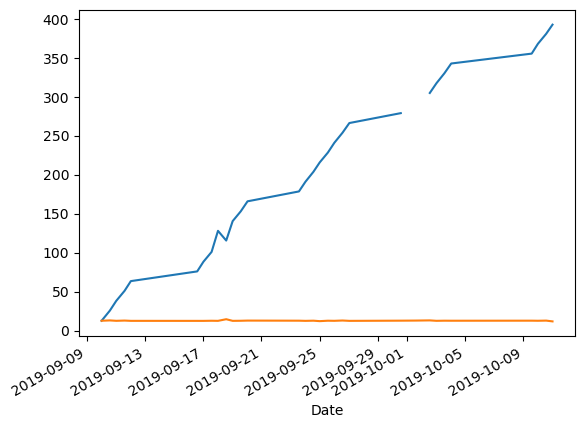

In [253]:
df['Distance'].plot.line()  # 판다스 plot 객체는 데이터프레임이나 시리즈를 통하여 접근
plt.show()

- 아래와 같이 누적 거리를 계산한 후, 이를 시각화 할 수 있다:

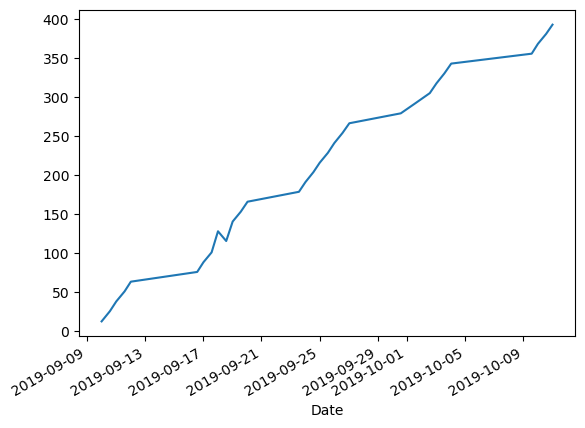

In [254]:
df['Distance'].cumsum().plot.line();
plt.show()

- 이러한 시각화를 위하여,  
  배후에서 `matplotlib` 라이브러리가 작동하는데,  
  다양한 설정 선택사항이 제공된다:

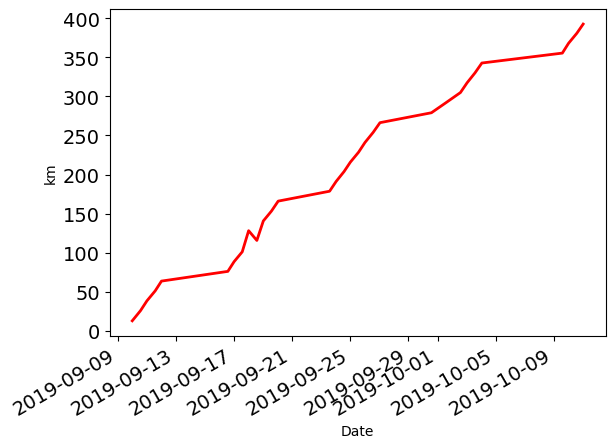

In [255]:
df['Distance'].cumsum().plot.line(fontsize=14,    # 글꼴 크기
                                  linewidth = 2,  # 선 굵기
                                  color = 'r',    # 선 색상
                                  ylabel="km")    # y 축 레이블
plt.show()

- 내장된 테마를 지정하여 풍부한 색상과 텍스트 형식을 시각화에 적용할 수 있다:

In [256]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')                                 # 스타일
plt.rcParams.update({'font.size': 16,                   # 글꼴 크기
                     'axes.labelweight': 'bold',        # 축 레이블 굵기
                     'figure.figsize': (8,6)})          # 그림 크기

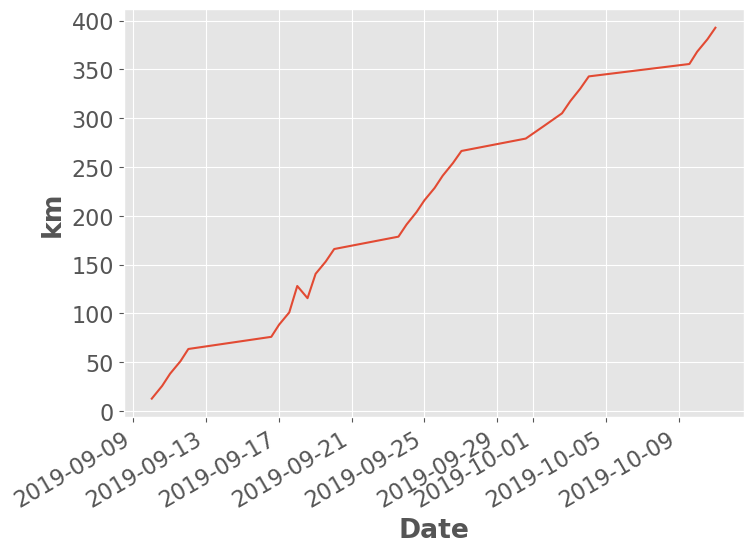

In [257]:
df['Distance'].dropna().cumsum().plot.line(ylabel="km")
plt.show()

- 자신만의 맞춤형 테마를 만드는 사람들도 있는데,  
  아래와 같은 테마를 [사이버펑크 테마](https://github.com/dhaitz/mplcyberpunk)라고 한답니다:
  - 원문에서 제시한 설치 방법은 다음과 같다:  
  
    ```shell
    $ pip install mplcyberpunk
    ``` 
  - 우리는 아나콘다 파이썬을 사용하고 있으므로, 먼저 콘다에서 설치를 시도해 본다: 

    ```shell
    $ conda install mplcyberpunk
    ```
  - 설치가 되지 않는다면, 채널을 추가 지정해서 다시 시도해 보라: 

    ```shell
    $ conda install -c conda-forge mplcyberpunk
    ```
  - 이렇게 하고도 콘다에서 설치가 안된다면,  
    아나콘다 저장소에 등록되지 않았을 가능성이 크며,  
    `pip`로만 설치되는 것일 가능성이 높다. 
  - `pip`로 설치해도 작동에는 아무런 문제가 없다.  

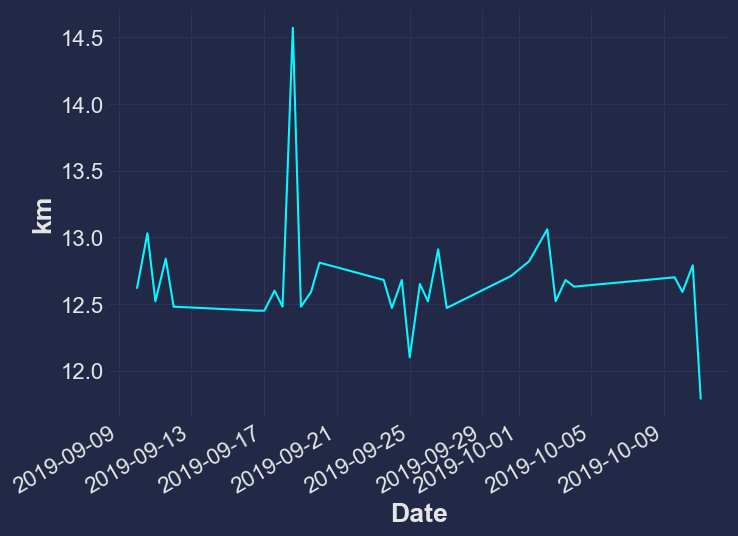

In [258]:
import mplcyberpunk                     # 테마 모듈 수입
plt.style.use("cyberpunk")              # 스타일  

df['Distance'].plot.line(ylabel="km")   # y 축 레이블

plt.show()

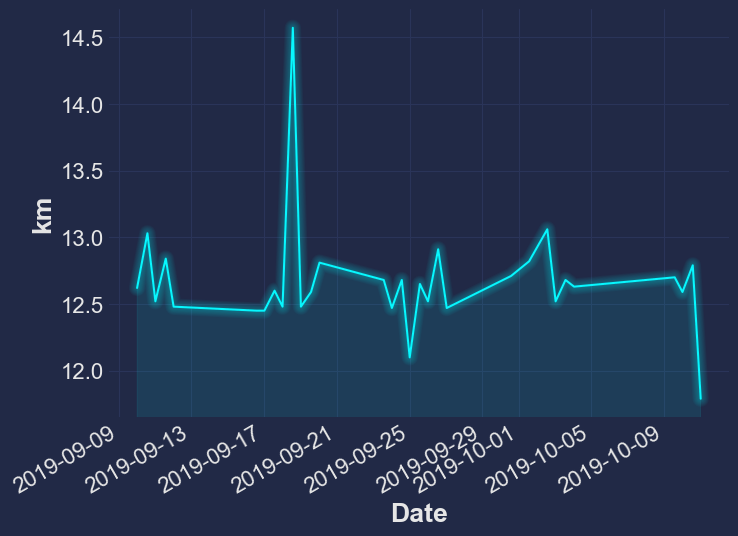

In [259]:
import mplcyberpunk                     # 테마 모듈 수입
plt.style.use("cyberpunk")              # 스타일  

df['Distance'].plot.line(ylabel="km")   # y 축 레이블
mplcyberpunk.add_glow_effects()         # 타오르는 효과 !!!

plt.show()

- 시각화 유형이 매우 다양하다: 

|메소드|시각화 유형|
|---|---|
|`bar` 또는 `barh` | 막대 그래프|
|`hist` | 히스토그램|
|`box` | 박스 플롯|
|`kde` 또는 `density` | 밀도 플롯|
|`area` | 면적 플롯|
|`scatter` | 산점도|
|`hexbin` | 육각형 지도|
|`pie` | 파이 차트|

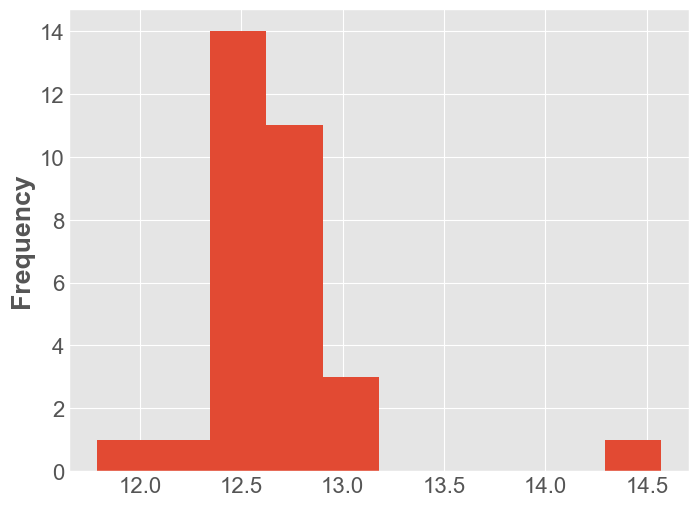

In [260]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})

df['Distance'].plot.hist()                         # 도수분포도

plt.show()

- 아래 예제를 실행하기 전에 다음과 같이 모듈을 설치하라.  
  `scipy`는 과학계산 및 기술계산을 위한 파이썬 라이브러리이다. 
```shell
$ conda install scipy
```

- 판다스 밀도 플롯(density plot)은 도수분포도(histogram)를 연속형으로 확장한 개념과 유사하다.  
  아래 밀도 플롯은 `Distance` 변수에 대한 확률밀도함수를 시각화한 결과이다.

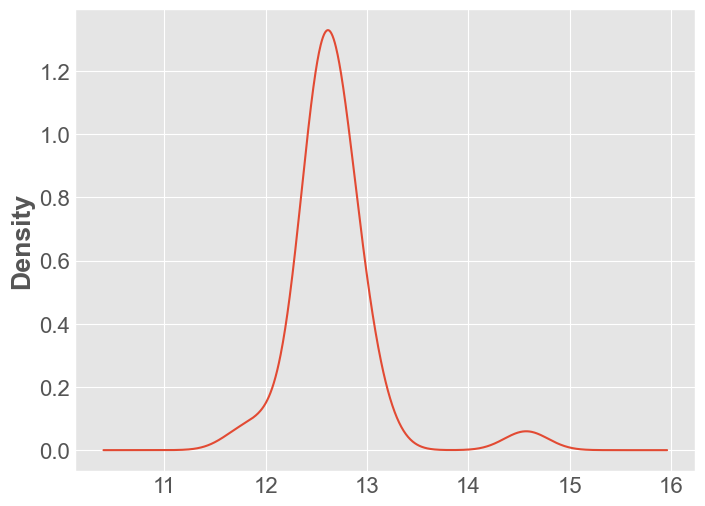

In [261]:
df['Distance'].plot.density()  # 자전거 출근 거리의 확률밀도함수 시각화
plt.show()

- 4.1 항에서는 판다스 `plot` 객체를 사용한 단순 시각화를 공부했다. 
- 4.2 항에서는 판다스 `plotting` 객체를 사용한 시각화를 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 4.2 판다스 시각화

- 판다스도 상당히 다양한 시각화 함수를 `pandas.plotting` 모듈로 제공하고 있다.  
  아래 자료를 참고하라. 
  - 데이터 사이언스 스쿨에서 제공하는 국문 문서 [Pandas의 시각화 기능](https://datascienceschool.net/01%20python/05.05%20%ED%8C%90%EB%8B%A4%EC%8A%A4%EC%9D%98%20%EC%8B%9C%EA%B0%81%ED%99%94%20%EA%B8%B0%EB%8A%A5.html)
  - 판다스에서 제공하는 영문 문서 [Pandas Plotting tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools)


In [262]:
from pandas.plotting import scatter_matrix  # (plot 객체가 아닌) plotting 객체

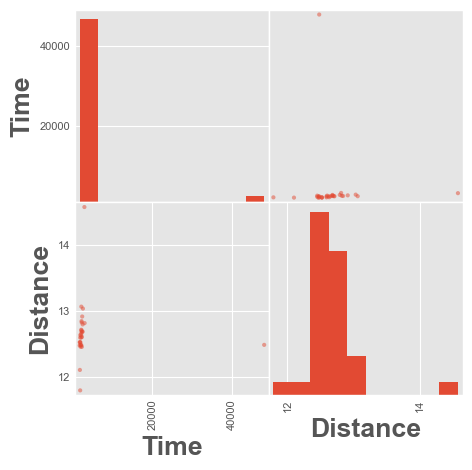

In [263]:
scatter_matrix(df, figsize=(5, 5))
plt.show()

- 자전거 출퇴근 데이터에서 시간 데이터에는 이상치가 포함되어 있다.  
  시간 수치에 등장하는 48,000을 초과하는 수치를 제거하고, 다시 시각화하자. 


In [264]:
df.query('Time > 4000')

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-19 00:30:01,Afternoon Ride,Ride,48062,12.48,Feeling good


In [265]:
df['Time'].dropna().mean()                      # 이상치 제거 전 평균값 

3626.9032258064517

In [266]:
df['Time'].dropna()[df['Time'] < 40000].mean()  # 이상치 제거 후 평균값

2145.733333333333

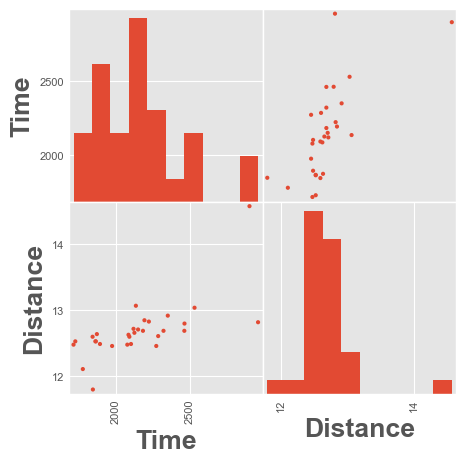

In [267]:
scatter_matrix(df.query('Time < 4000'), figsize=(5, 5), alpha=1)
plt.show()

- 4 절에서 데이터프레임 시각화를 공부했다. 
- 5 절에서 판다스 프로파일링을 공부하자. 
  
<div style="page-break-after: always;"></div> 

## 5. 판다스 프로파일링

- 판다스 프로파일링(profiling)은 요약 보고서를 생성하는 유용한 도구이다.   
  - 데이터프레임에 대한 **탐색적 데이터 분석(exploratory data analysis, EDA)**을 수행해 준다.
  - [Pandas profiling](https://github.com/pandas-profiling/pandas-profiling)은 기본적인 판다스에 포함되어 있지 않다.  
    아래 명령으로 추가적으로 설치할 수 있다: 
    ```shell
    $ pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
    ```

In [268]:
import pandas_profiling
df = pd.read_csv('../data/cycling_data.csv', parse_dates=['Date'])
df.head()

,Date,Name,Type,Time,Distance,Comments
0,2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
1,2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2,2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


In [269]:
df.profile_report(progress_bar=False)

In [270]:
df.describe(include='all', datetime_is_numeric=True)

,Date,Name,Type,Time,Distance,Comments
count,33,33,33,33.000000,31.000000,33
unique,NaN,2,1,NaN,NaN,25
top,NaN,Afternoon Ride,Ride,NaN,NaN,Stopped for photo of sunrise
freq,NaN,17,33,NaN,NaN,3
mean,2019-09-24 22:56:28.636363776,NaN,NaN,3512.787879,12.667419,NaN
min,2019-09-10 00:13:04,NaN,NaN,1712.000000,11.790000,NaN
25%,2019-09-18 00:15:52,NaN,NaN,1863.000000,12.480000,NaN
50%,2019-09-25 00:07:21,NaN,NaN,2118.000000,12.620000,NaN
75%,2019-10-02 00:13:09,NaN,NaN,2285.000000,12.750000,NaN
max,2019-10-11 00:16:57,NaN,NaN,48062.000000,14.570000,NaN


In [271]:
df[df['Time'] >= 4000]

,Date,Name,Type,Time,Distance,Comments
10,2019-09-19 00:30:01,Afternoon Ride,Ride,48062,12.48,Feeling good


In [272]:
df = df[df['Time'] < 4000]
df.describe(include='all', datetime_is_numeric=True)

,Date,Name,Type,Time,Distance,Comments
count,32,32,32,32.000000,30.000000,32
unique,NaN,2,1,NaN,NaN,25
top,NaN,Afternoon Ride,Ride,NaN,NaN,Stopped for photo of sunrise
freq,NaN,16,32,NaN,NaN,3
mean,2019-09-25 03:23:33.249999872,NaN,NaN,2120.625000,12.673667,NaN
min,2019-09-10 00:13:04,NaN,NaN,1712.000000,11.790000,NaN
25%,2019-09-17 21:37:47.500000,NaN,NaN,1862.250000,12.490000,NaN
50%,2019-09-25 06:51:31,NaN,NaN,2109.500000,12.625000,NaN
75%,2019-10-02 03:36:23.249999872,NaN,NaN,2275.250000,12.770000,NaN
max,2019-10-11 00:16:57,NaN,NaN,2961.000000,14.570000,NaN


In [273]:
df.profile_report(progress_bar=False)

- 5 절 판다스 프로파일링에 관한 소개를 마친다. 

- 본 장에서는 "**데이터 정제 및 분석 응용**"을 공부했다. 
  - 문자열 작업
  - 날짜/시간 다루기
  - 계층적 인덱싱
  - 데이터 시각화 맛보기
  - 판다스 프로파일링
  
  <div style="page-break-after: always;"></div> 

- 이상으로 "**데이터 과학을 위한 데이터 분석**" 강좌를 마무리한다.  

![cover_both](https://user-images.githubusercontent.com/10287629/135799992-d7699cbf-1ae0-49f7-b863-56350e0463d5.png)

<div style="page-break-after: always;"></div> 

- 데이터 분석 공부를 마쳤다면, 데이터 시각화 강좌로 진행하기를 권한다. 
  - 데이터 분석 강좌와 데이터 시각화 강좌를 편의상 분리하였지만,  
    단일 강좌로 편성하는 것이 적합하다. 
  - 데이터 분석 및 데이터 시각화 공부를 마친 후,  
    빅데이터 및 인공지능 강좌를 공부하기를 권한다. 

![00_roadmap](https://user-images.githubusercontent.com/10287629/135822640-7a8a4a7e-964b-41a9-9fb7-2dbd2f94b614.png)